# ESG Risk Level Analysis using ML


### Anirudh Mehotra


# DATASET: 

This dataset exclusively showcases companies from the S&P 500 index. Researchers, investors, analysts, and policy-makers can utilize this dataset to gain insights into the ESG performance and risk profiles of these major corporations. Whether exploring trends, conducting ESG assessments, or making informed investment decisions, this dataset serves as a valuable resource for comprehending the sustainability and governance practices of S&P 500 companies.

# GOAL:

The model aims to provide decision-makers and investors with a robust tool for evaluating a company's ESG (Environmental, Social, and Governance) risk level based on specific inputs. By simply inputting relevant company data, users receive a quantitative ESG risk profile, essential for any informed investment decision or responsible management strategy.

In [100]:
#Importing the necessary packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from wordcloud import WordCloud
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.metrics import mean_squared_error
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Ridge
from math import sqrt
import pickle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
#Removing warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
#Reading the Actual ESG score CSV File
esg_scores_data = pd.read_csv('SP 500 ESG Risk Ratings.csv')
#Printing the first 10 rows of the dataset
esg_scores_data.head(10)

Symbol                         Name  \
0      A     Agilent Technologies Inc   
1    AAL  American Airlines Group Inc   
2    AAP       Advance Auto Parts Inc   
3   AAPL                    Apple Inc   
4   ABBV                   Abbvie Inc   
5    ABC       Amerisourcebergen Corp   
6    ABT          Abbott Laboratories   
7   ACGL       Arch Capital Group Ltd   
8    ACN           Accenture Plc Cl A   
9   ADBE                    Adobe Inc   

                                             Address              Sector  \
0  5301 Stevens Creek Boulevard\nSanta Clara, CA ...          Healthcare   
1  1 Skyview Drive\nFort Worth, TX 76155\nUnited ...         Industrials   
2  4200 Six Forks Road\nRaleigh, NC 27609\nUnited...   Consumer Cyclical   
3  One Apple Park Way\nCupertino, CA 95014\nUnite...          Technology   
4  1 North Waukegan Road\nNorth Chicago, IL 60064...          Healthcare   
5  1 West First Avenue\nConshohocken, PA 19428-18...          Healthcare   
6  100 Abbott Park Road\nAbbott Park\nNorth Chica...          Healthcare   
7  Waterloo House\nGround Floor 100 Pitts Bay Roa...  Financial Services   
8  1 Grand Canal Square\nGrand Canal Harbour\nDub...          Technology   
9  345 Park Avenue\nSan Jose, CA 95110-2704\nUnit...          Technology   

                          Industry Full Time Employees  \
0           Diagnostics & Research              18,000   
1                         Airlines             132,500   
2                 Specialty Retail              40,000   
3             Consumer Electronics             164,000   
4       Drug Manufacturers—General              50,000   
5             Medical Distribution              46,000   
6                  Medical Devices             115,000   
7            Insurance—Diversified               5,800   
8  Information Technology Services             732,000   
9          Software—Infrastructure              29,239   

                                         Description  Total ESG Risk score  \
0  Agilent Technologies, Inc. provides applicatio...                  15.0   
1  American Airlines Group Inc., through its subs...                  29.0   
2  Advance Auto Parts, Inc. provides automotive r...                  12.0   
3  Apple Inc. designs, manufactures, and markets ...                  17.0   
4  AbbVie Inc. discovers, develops, manufactures,...                  28.0   
5  AmerisourceBergen Corporation sources and dist...                  12.0   
6  Abbott Laboratories, together with its subsidi...                  25.0   
7  Arch Capital Group Ltd., together with its sub...                  21.0   
8  Accenture plc, a professional services company...                  10.0   
9  Adobe Inc., together with its subsidiaries, op...                  12.0   

   Environment Risk Score  Governance Risk Score  Social Risk Score  \
0                     0.3                    6.3                8.6   
1                    12.0                    5.0               12.0   
2                     0.0                    3.0                8.0   
3                     0.6                    9.2                6.9   
4                     1.1                    9.9               16.8   
5                     1.3                    5.2                5.6   
6                     3.0                    8.4               13.6   
7                     1.0                   12.0                7.0   
8                     0.3                    4.8                4.6   
9                     1.9                    4.6                5.9   

  Controversy Level  Controversy Score ESG Risk Percentile ESG Risk Level  
0               Low                1.0     11th percentile            Low  
1          Moderate                2.0     62nd percentile            NaN  
2          Moderate                2.0      4th percentile     Negligible  
3       Significant                3.0     15th percentile            Low  
4       Significant                3.0     55th perce

The above rows and columns represent:

Symbol: The stock symbol for the company

Name: The full name of the company

Address: The company's address

Sector: The sector in which the company operates

Industry: The industry classification of the company

Full Time Employees: The number of full-time employees

Description: A brief description of the company

Total ESG Risk score: A score representing the total ESG risk associated with the company

Environment Risk Score: A score representing the environmental risk of the company

Governance Risk Score: A score representing the governance risk of the company

Social Risk Score: A score representing the social risk of the company

Controversy Level: The level of controversy associated with the company, with possible values like Low, Moderate, Significant

Controversy Score: A numerical score representing the level of controversy

ESG Risk Percentile: The ESG risk percentile in which the company falls

ESG Risk Level: The ESG risk level, such as Low, Medium, or NaN

In [3]:
#The statistics summary is printed
esg_summary_stats = (
    esg_scores_data.describe()  
#Removing the Count column
    .drop("count", axis=0)  
    .style.background_gradient(axis=0, cmap="viridis") 
    .set_properties(**{"text-align": "center"})  
    .set_table_styles([{"selector": "th", "props": [("background-color", "#555")]}])  
    .set_caption("Detailed ESG Score Summary")  
)
#The statistics summary is displayed
esg_summary_stats

From the above summary statistics, we can conclude that

The average Total ESG Risk Score across all companies in the dataset is approximately 21.42 and as for the scores it has a standard deviation of about 7.26, indicating variability in the ESG risk across companies. The lowest Total ESG Risk Score is 7.00 followed by 25th percentile is considered to be 16.00, indicating that 25% of the companies have a score below this value and 50th percentile (median) is 21.00, showing the middle point of the data and finally the 75th percentile is 26.00, meaning 75% of companies have a score below this and 25% are above.

These statistics provide a quantitative assessment of the ESG performance of the companies in our dataset. The mean values give a central tendency, while the standard deviation provides an understanding of the spread of scores around the mean. The percentiles help in understanding the distribution of the data, and the minimum and maximum values offer insights into the range of scores observed. This summary can serve as a basis to discuss risk assessments, investment considerations, or corporate social responsibility analysis in your project.

In [4]:
#Defining a function that evaluates the missing values, unique counts
def assess_dataset_quality(dataset):
    summary = []
    columns = dataset.columns 
#Iterates through the columns to get the data metrics
    for column in columns:
        non_null_count = dataset[column].count()
        data_type = dataset[column].dtype
        unique_values_count = dataset[column].nunique()
        missing_values_count = dataset[column].isnull().sum()
        duplicate_rows_count = dataset.duplicated().sum()
        summary.append([column, data_type, non_null_count, unique_values_count, missing_values_count, duplicate_rows_count])
 #A DF is created which represents the data summary    
    quality_summary = pd.DataFrame(summary, columns=["Column", "Data Type", "Non-Null Count", 
                                                     "Unique Values", "Missing Values", "Duplicate Rows"])
    return quality_summary
#The data is preprocessed where the rows are removed representing the null values 
processed_data = esg_scores_data.dropna(subset=['Sector', 'Total ESG Risk score', 'Controversy Level',
                                                'ESG Risk Level','Full Time Employees']).reset_index(drop=True)
print(f"Dataset dimensions after preprocessing: {processed_data.shape}")
#The data quality assessment is applied 
quality_check_report = (
    assess_dataset_quality(processed_data)
    .style.background_gradient(axis=0, cmap="cividis")  
    .set_properties(**{"text-align": "center"}) 
    .set_table_styles([{"selector": "th", "props": [("background-color", "#333")]}])  
    .set_caption("Comprehensive Data Quality Report") 
)
#The data quality is dsiplayed
quality_check_report

Dataset dimensions after preprocessing: (348, 15)


# ESG Score Distribution Analysis

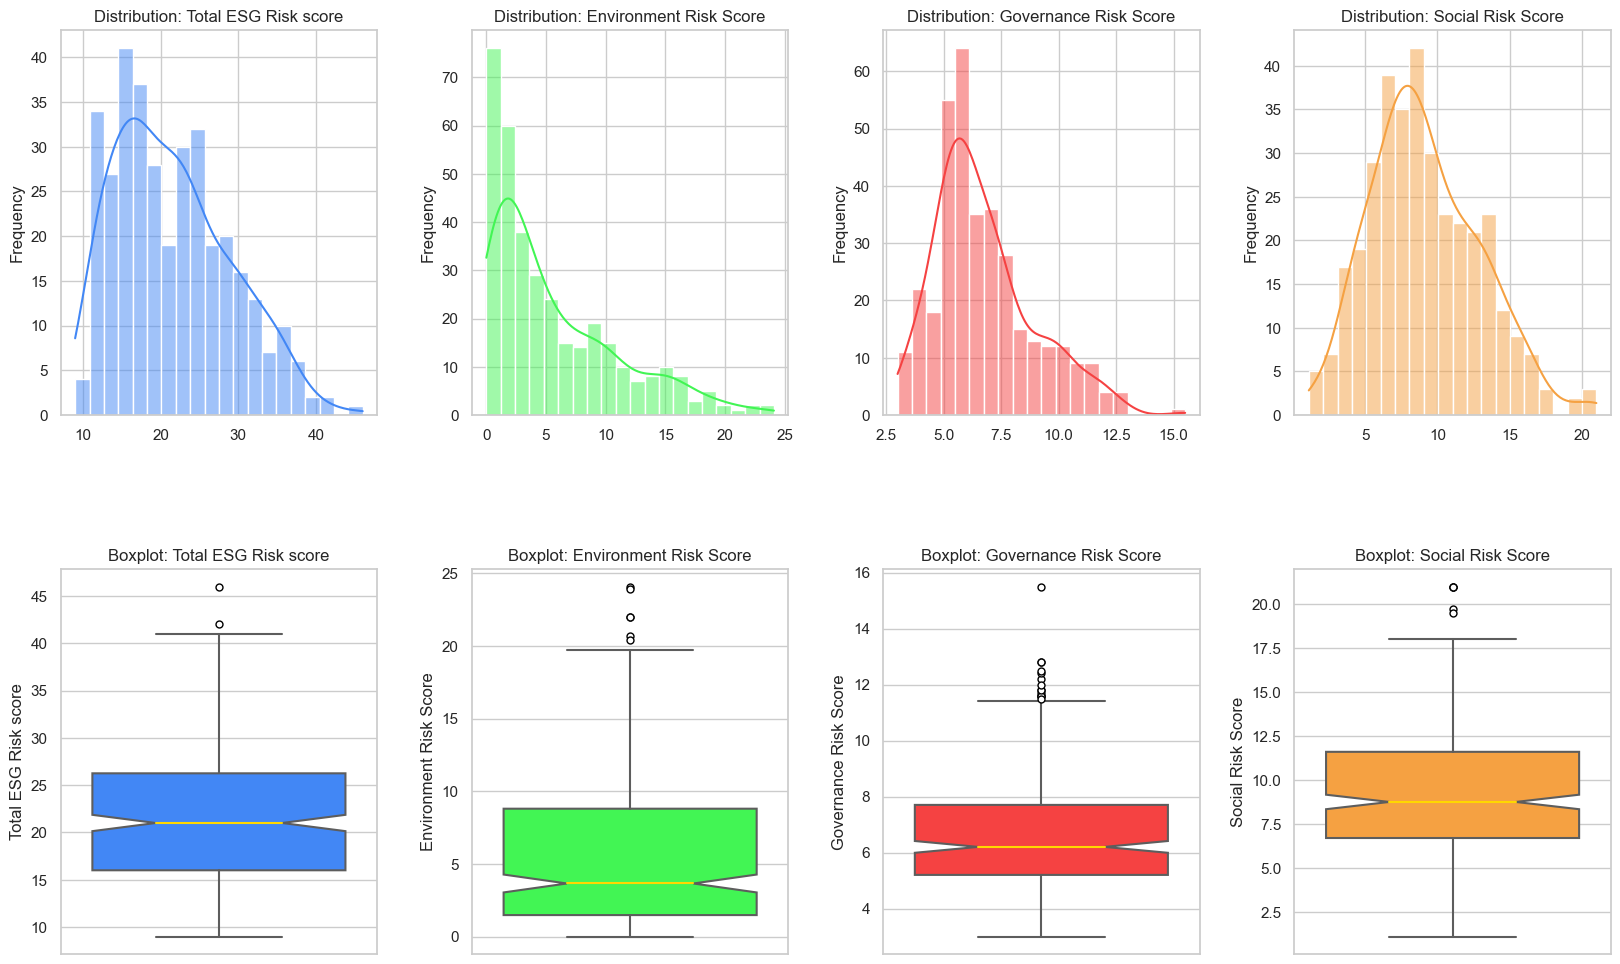

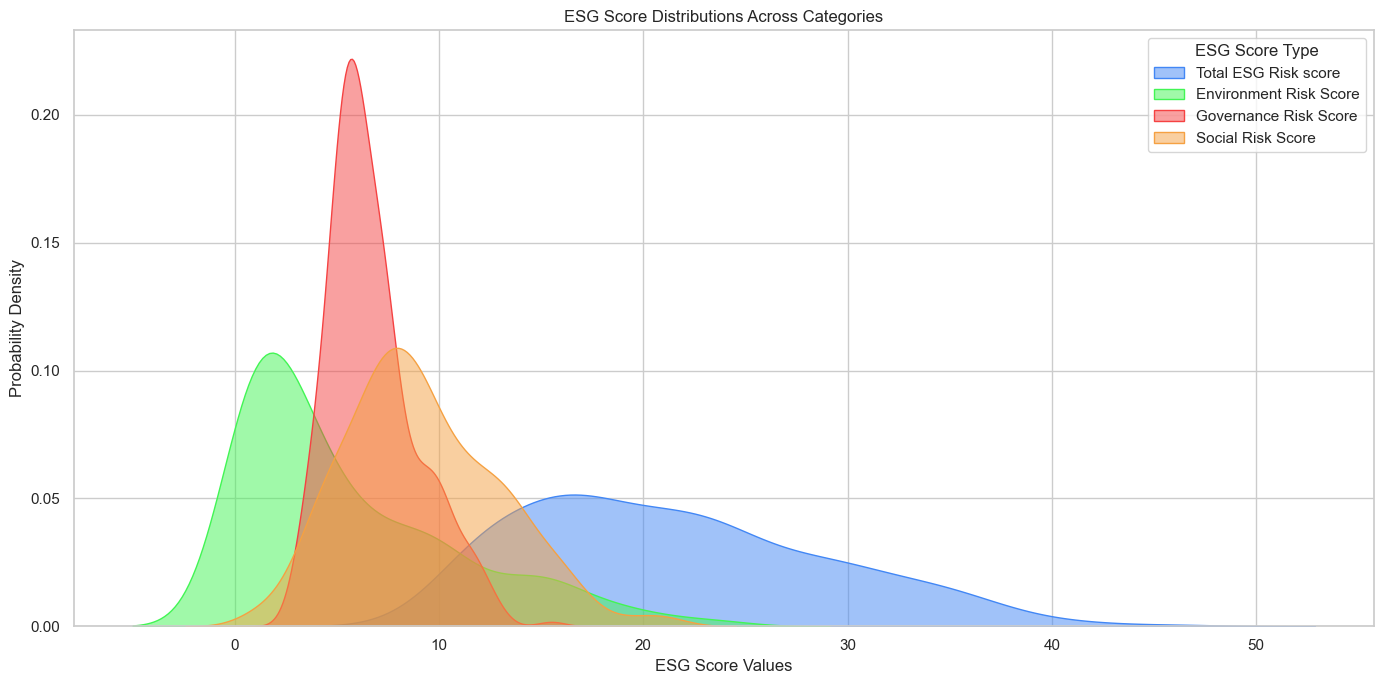

In [5]:
#Taking the subset for the score analysis
selected_esg_data = processed_data[['Total ESG Risk score', 'Environment Risk Score', 
                                    'Governance Risk Score', 'Social Risk Score']]
sns.set_theme(style="whitegrid") 
custom_colors = ["#4287f5", "#42f554", "#f54242", "#f5a142"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  
plt.subplots_adjust(wspace=0.3, hspace=0.4)  
#The ESG scores are iterated for visualizations with both the histogram and boxplot
for index, score_type in enumerate(selected_esg_data.columns):
    sns.histplot(
        selected_esg_data[score_type], 
        bins=20, 
        kde=True, 
        ax=axes[0, index], 
        color=custom_colors[index]
    ).set(title=f'Distribution: {score_type}', xlabel='', ylabel='Frequency')
#Displaying the boxplots
    sns.boxplot(
        y=selected_esg_data[score_type], 
        ax=axes[1, index], 
        color=custom_colors[index],
        saturation=1,
        notch=True,  
        showcaps=True, 
        flierprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
        medianprops={"color": "gold"}
    ).set(title=f'Boxplot: {score_type}', xlabel='', ylabel=score_type)
#The KDE (Kernel Density Estimate) KDE is plotted
plt.figure(figsize=(14, 7)) 
for index, score_type in enumerate(selected_esg_data.columns):
    sns.kdeplot(
        selected_esg_data[score_type], 
        color=custom_colors[index], 
        label=score_type, 
        fill=True,
        alpha=0.5 
    )
plt.xlabel('ESG Score Values')
plt.ylabel('Probability Density')
plt.title('ESG Score Distributions Across Categories')
plt.legend(title="ESG Score Type")
plt.tight_layout()  
plt.show()

Histograms and KDE Plots: The first image shows histograms and KDE plots for each of the four ESG scores in different colors. Each histogram visualizes the frequency distribution of scores, indicating how many companies fall within various score ranges. The KDE plot overlays the histogram, providing a smooth estimate of the distribution. This visualization helps to see the shape of the data distribution, identify skewness, and detect any multimodality.

Box Plots: Box plots are used to show the distribution of quantitative data and to spot outliers. The central rectangle spans the first quartile to the third quartile, a vertical line goes through the box at the median, and "whiskers" extend to the smallest and largest values that are not outliers.

Combined KDE Plot: The peaks of the KDE plots give an idea about the modality of the distributions and where the majority of the scores lie.
The different colors represent different ESG scores, making it easy to compare them visually.

In [6]:
#The outliers are identified and calculated 
esg_outliers_info = {}
for score_column in selected_esg_data.columns:
    first_quartile = selected_esg_data[score_column].quantile(0.25)
    third_quartile = selected_esg_data[score_column].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    lower_threshold = first_quartile - 1.5 * interquartile_range
    upper_threshold = third_quartile + 1.5 * interquartile_range
    detected_outliers = selected_esg_data[(selected_esg_data[score_column] < lower_threshold) | (selected_esg_data[score_column] > upper_threshold)]
    esg_outliers_info[score_column] = detected_outliers
#The summary statistics are displayed 
esg_score_summary = selected_esg_data.describe()
print("Comprehensive Summary Statistics for ESG Scores:\n")
print(tabulate(esg_score_summary, headers='keys', tablefmt='github'))
#The outliers that were detected in each of the ESG scores are displayed 
for score_type, outliers_data in esg_outliers_info.items():
    if not outliers_data.empty:
        print(f"\nDetected Outliers in {score_type}:")
        print(tabulate(outliers_data, headers='keys', tablefmt='github'))
    else:
        print(f"\nNo Detected Outliers in {score_type}.")

Comprehensive Summary Statistics for ESG Scores:

|       |   Total ESG Risk score |   Environment Risk Score |   Governance Risk Score |   Social Risk Score |
|-------|------------------------|--------------------------|-------------------------|---------------------|
| count |              348       |                348       |               348       |           348       |
| mean  |               21.4914  |                  5.58563 |                 6.73103 |             9.16954 |
| std   |                7.38114 |                  5.38052 |                 2.15178 |             3.78104 |
| min   |                9       |                  0       |                 3       |             1.1     |
| 25%   |               16       |                  1.475   |                 5.2     |             6.7     |
| 50%   |               21       |                  3.65    |                 6.2     |             8.75    |
| 75%   |               26.25    |                  8.8     |         

From the above summary statistics table, we can conclude that, 

The dataset includes 348 observations (companies) for each of the ESG risk scores. The mean Total ESG Risk score is approximately 21.49, with a standard deviation of 7.38, indicating variability among companies. The Environmental Risk Score has an average of 5.58 with a standard deviation of 5.38, suggesting a broad range of environmental risk levels across companies. The Governance Risk Score mean is approximately 6.73 with a standard deviation of 2.15, which is relatively lower compared to the Environmental Risk Score's standard deviation. The Social Risk Score has the highest mean of the three at about 9.16, and also a higher standard deviation of 3.78, indicating a wider spread of scores.

For the Total ESG Risk score, the 25th percentile is 16.0, the median (50th percentile) is 21.0, and the 75th percentile is 26.0.
Environmental Risk Score has the lowest 25th percentile at 1.5, suggesting that a quarter of the companies have very low environmental risk.
Social Risk Score has higher 25th and 75th percentiles (6.7 and 11.6, respectively) than the other scores, indicating a higher baseline and increased risk for many companies. The distribution of scores and the identification of outliers can be useful for risk assessment, informing investment strategies, and highlighting areas where companies may need to improve their ESG performance.

In [7]:
#The original dataset is duplicated to preserve the data
cleaned_data = processed_data.copy()
#The outliers are removed from each ESG score category
for score_type in selected_esg_data.columns:
    first_quartile = selected_esg_data[score_type].quantile(0.25)
    third_quartile = selected_esg_data[score_type].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    lower_limit = first_quartile - 1.5 * interquartile_range
    upper_limit = third_quartile + 1.5 * interquartile_range
    cleaned_data = cleaned_data[(cleaned_data[score_type] >= lower_limit) & (cleaned_data[score_type] <= upper_limit)]
#The DF is reset to start from 0
cleaned_data.reset_index(drop=True, inplace=True)
#Printing the outliers
print(f"Dataset dimensions after outlier removal: {cleaned_data.shape}")

Dataset dimensions after outlier removal: (323, 15)


Outliers can skew the results of ESG risk assessments, leading to over- or underestimation of risk. The IQR method is non-parametric, making it robust to non-normal distributions often found in ESG data. Outliers in the dataset are detected using the Interquartile Range (IQR) method. For each column in the dataset, the first quartile (Q1) and third quartile (Q3) are calculated. After removing the outliers, the index of the dataframe is reset, which means the index now starts from 0 and is continuous without gaps that might have been created due to the removal of outlier rows. 

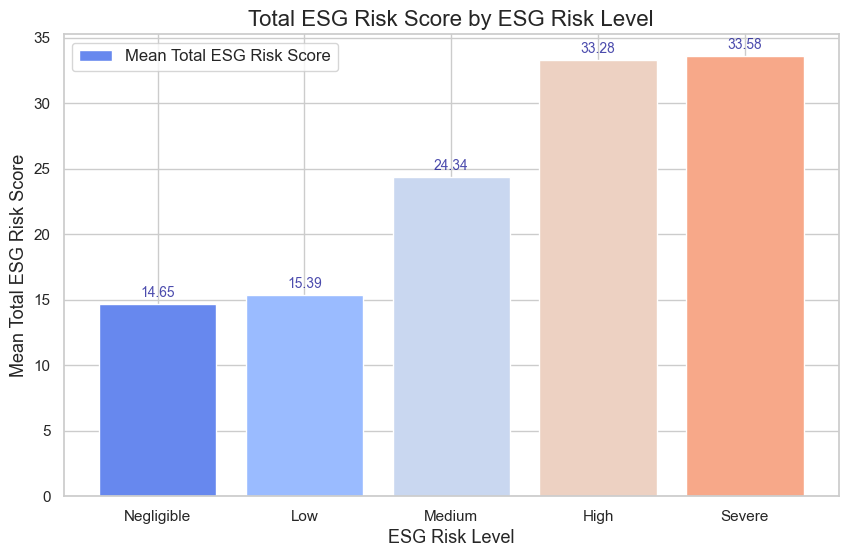

In [8]:
#Grouping the 'ESG Risk Level' where the 'Total ESG Risk Score' is calculated 
grouped_data = cleaned_data.groupby('ESG Risk Level')['Total ESG Risk score'].mean().reset_index()
#The ESG risk levels are defined 
risk_levels = ['Negligible', 'Low', 'Medium', 
               'High', 'Severe']
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = plt.subplot()
#It is grouped by ESG Risk Level
grouped_data = grouped_data.loc[grouped_data['ESG Risk Level'].isin(risk_levels)]
grouped_data = grouped_data.set_index('ESG Risk Level').loc[risk_levels].reset_index()
palette = sns.color_palette("coolwarm") 
#A Bar Chart is created for the tar var with the seaborn technique
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color=palette)
plt.xlabel('ESG Risk Level', fontsize=13)
plt.ylabel('Mean Total ESG Risk Score', fontsize=13)
plt.title('Total ESG Risk Score by ESG Risk Level', fontsize=16)
ax.legend([f'Mean Total ESG Risk Score'], fontsize=12, loc='upper left')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10,
                color='darkblue', alpha=0.7)
#Plotting the tar var
plt.show()

There is an ascending trend in the mean Total ESG Risk Scores as the ESG Risk Level increases from "Negligible" to "Severe". Companies classified under "Severe" risk level have the highest mean Total ESG Risk Score at 33.58, which is more than double the score of companies classified under "Low" risk level. There is a consistent increase in the mean Total ESG Risk Score from one category to the next, suggesting a clear correlation between the assigned risk level and the Total ESG Risk Score.

This chart could be used by investors or stakeholders to understand the relationship between the risk level and the ESG scoring. Higher risk levels are associated with higher ESG risk scores. It can also serve as a visual tool for reporting or analysis, providing a quick and clear understanding of how ESG risks are distributed across different risk categories.

In [9]:
#The unique values from the sector col are counted 
unique_sectors = cleaned_data['Sector'].nunique()
#The unique sectors are displayed
print(f"Total Unique Sectors: {unique_sectors}")
#The unique values from the industry col are counted 
unique_industries = cleaned_data['Industry'].nunique()
#The unique industry are displayed
print(f"Total Unique Industries: {unique_industries}")

Total Unique Sectors: 11
Total Unique Industries: 102


In [10]:
#The average ESG scores of sector are calculated
sector_avg_esg_scores = cleaned_data.groupby('Sector')[['Environment Risk Score', 
                                                        'Governance Risk Score', 'Social Risk Score']].mean().reset_index()
#The average ESG scores of industry are calculated
# Calculate the industry-wise average ESG scores
industry_avg_esg_scores = cleaned_data.groupby('Industry')[['Environment Risk Score', 
                                                            'Governance Risk Score', 'Social Risk Score']].mean().reset_index()
esg_component_colors = {'Environment Risk Score': "#00DFA2", 'Governance Risk Score': 
    "#0079FF", 'Social Risk Score': "#EF2F88"}
#Sector visualization
fig_sector_esg = px.bar(sector_avg_esg_scores, x='Sector', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                        title='Sector-wise Average ESG Scores',
                        labels={'value': 'Average Score', 'variable': 'ESG Component'},
                        color_discrete_map=esg_component_colors,
                        template='plotly_dark')
fig_sector_esg.update_xaxes(categoryorder='total ascending')
fig_sector_esg.update_traces(texttemplate='%{y:.2f}', textposition='outside')
#industry visualization
fig_industry_esg = px.bar(industry_avg_esg_scores, x='Industry', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                          title='Industry-wise Average ESG Scores',
                          labels={'value': 'Average Score', 'variable': 'ESG Component'},
                          color_discrete_map=esg_component_colors,
                          template='plotly_dark')
fig_industry_esg.update_xaxes(categoryorder='total ascending')
fig_industry_esg.update_traces(texttemplate='%{y:.2f}', textposition='outside')
#Displaying both the sector and industry 
fig_sector_esg.show()
fig_industry_esg.show()

The analysis begins by grouping the dataset by 'Sector' and 'Industry' to calculate the mean ESG scores for each. This sector and industry aggregation provides a clear view of ESG performance distribution across different segments of the market. Two bar charts are generated using Plotly. One for the sector-wise average ESG scores and another for the industry-wise average ESG scores. These charts provide a straightforward comparison of ESG performance metrics within sectors and industries. Due to the more granular categorization, the industry-wise chart features a wide array of industries, showcasing the variance of ESG scores within each. This detailed visualization can identify which industries may require more attention or are performing well in ESG metrics.

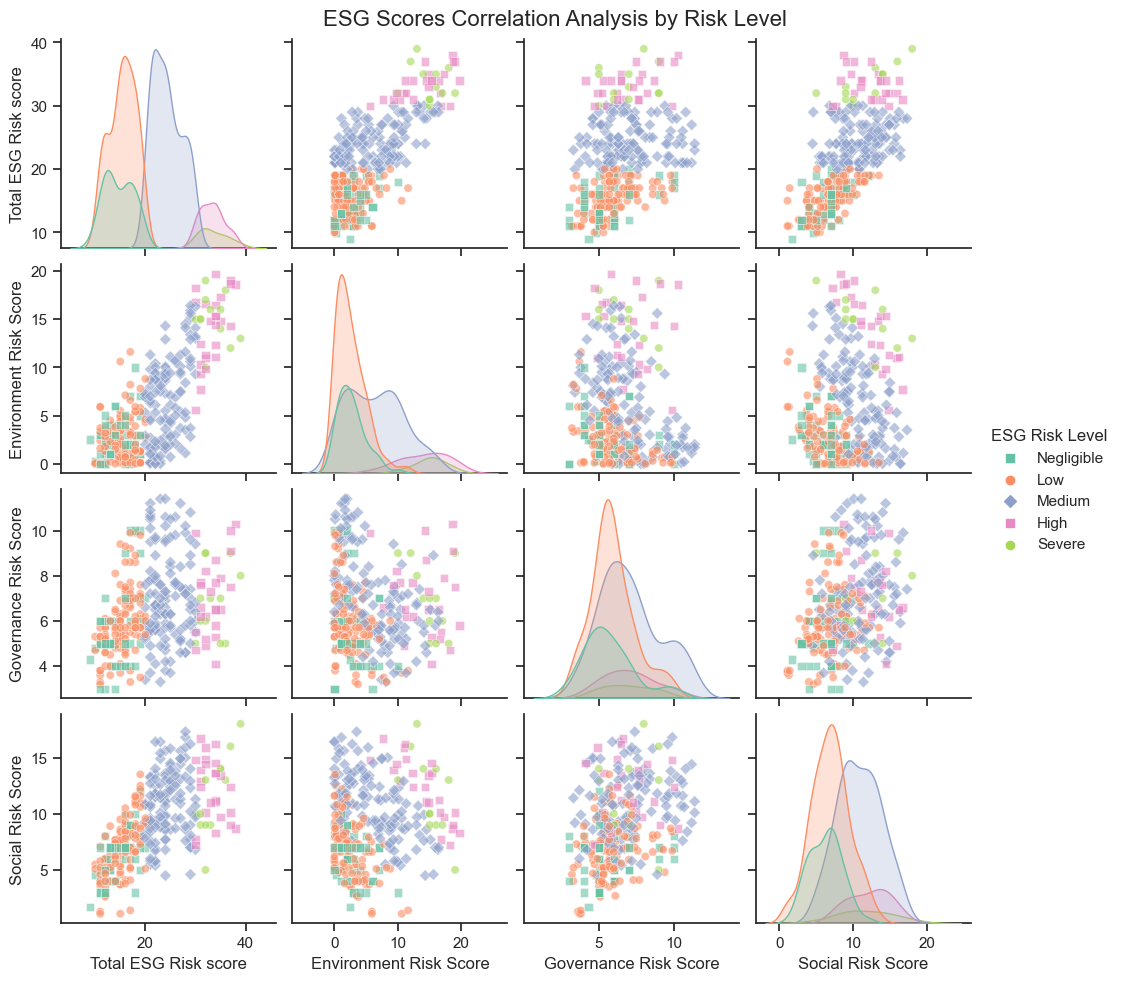

In [11]:
#Concentrating on only specific columns
selected_esg_columns = ['Total ESG Risk score', 'Environment Risk Score', 
                        'Governance Risk Score', 'Social Risk Score', 'ESG Risk Level']
esg_scores_visualization_data = cleaned_data[selected_esg_columns]
#The order of ESG Risk Levels are defined
esg_risk_level_order = ['Negligible', 'Low', 'Medium', 'High', 'Severe']
sns.set(style="ticks", palette="Set2")
#The pair plots are created 
esg_pairplot = sns.pairplot(esg_scores_visualization_data, 
                            hue="ESG Risk Level", 
                            hue_order=esg_risk_level_order,  
                            markers=["o", "s", "D"], 
                            diag_kind="kde",  
                            plot_kws={'alpha':0.6})  
esg_pairplot.fig.subplots_adjust(top=0.95)
esg_pairplot.fig.suptitle('ESG Scores Correlation Analysis by Risk Level', fontsize=16)
#Displaying the generated pair plots
plt.show()

The pairplot provides a multi-dimensional view of ESG scores, showing how each score relates to the others. The plot also allows for the quick identification of correlations between different types of risk scores. Data points are color-coded according to the ESG Risk Level, which includes categories such as 'Negligible', 'Low', 'Medium', 'High', and 'Severe'. This classification can be instrumental in risk assessment and decision-making processes. By categorizing companies by risk level, the plot enables stakeholders to easily identify which companies are potentially high-risk investments or require more due diligence.

The histograms or KDE plots along the diagonal provide insights into the distribution of each risk score. A distribution skewed towards higher scores suggests a prevalence of higher risk within the dataset for that specific ESG component.
These distribution plots also reveal the concentration of companies at various risk levels, which can help in understanding the overall ESG risk profile of the dataset.

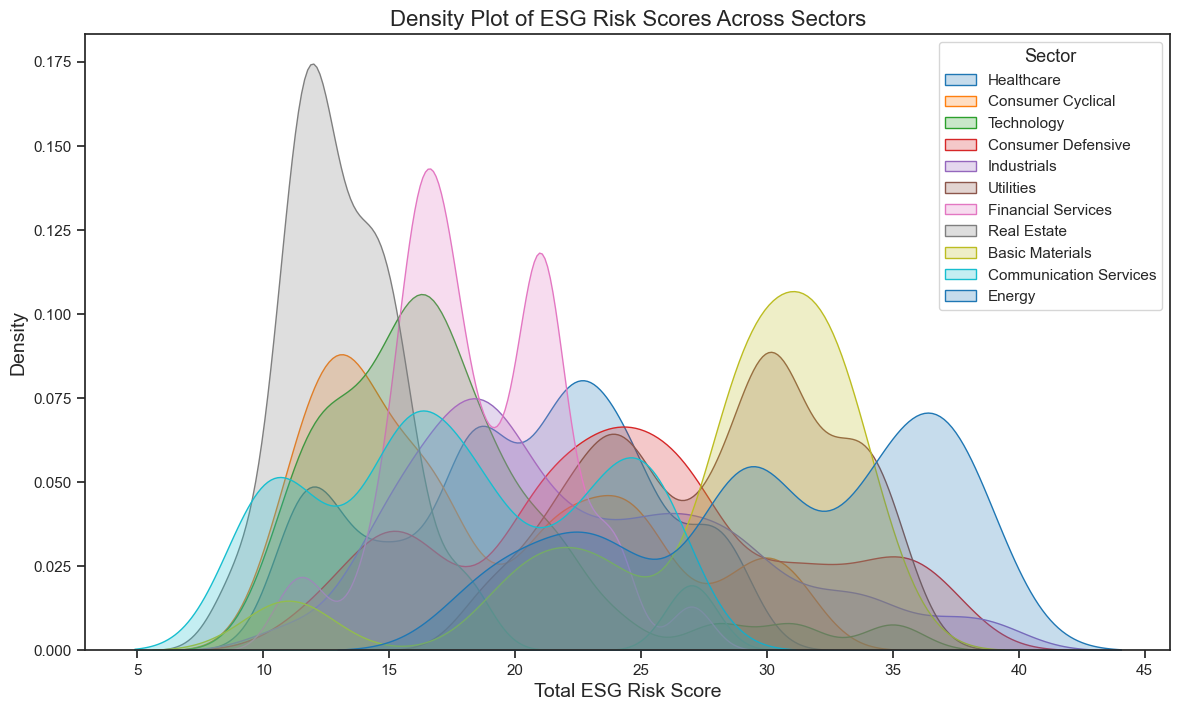

In [13]:
#Density Plot
plt.figure(figsize=(14, 8))
color_palette = sns.color_palette("tab10", n_colors=len(cleaned_data['Sector'].unique()))
#The colors are assigned for the specific sectors to distingush them 
sector_index = 0
#Each sectors are interated within the data 
for sector in cleaned_data['Sector'].unique():
#The Total ESG Risk Score is extracted
    sector_scores = cleaned_data[cleaned_data['Sector'] == sector]['Total ESG Risk score']
#The KDE plots are done  
    sns.kdeplot(sector_scores, label=sector, shade=True, bw_adjust=0.5, color=color_palette[sector_index])
    sector_index += 1
plt.title('Density Plot of ESG Risk Scores Across Sectors', fontsize=16)
plt.xlabel('Total ESG Risk Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
#Enhancing the legend for clarity
plt.legend(title='Sector', title_fontsize='13', fontsize='11')
#Displaying the plot
plt.show()

The plot displays kernel density estimates, which are smoothed, continuous representations of the data distribution for 'Total ESG Risk Score' across different sectors. Each sector's distribution is color-coded and labeled in the legend, making it easy to compare sectors. The plot suggests variability in ESG risk profiles between sectors. For example, certain sectors like Healthcare and Energy appear to have distinct peaks, suggesting concentrated ranges of ESG scores within those sectors.Some sectors show broader distributions (e.g., Technology), which indicates a wider range of ESG scores within those sectors. The plot provides insights into which sectors have higher or lower ESG risks, as indicated by the location and spread of the density curves. Sectors with density curves skewed towards higher ESG Risk Scores may be facing greater environmental, social, or governance challenges.

These visualizations helps the stakeholders understand the ESG risk profile across sectors, identify sectors with higher or lower ESG risks, and potentially guide investment decisions based on ESG considerations. 

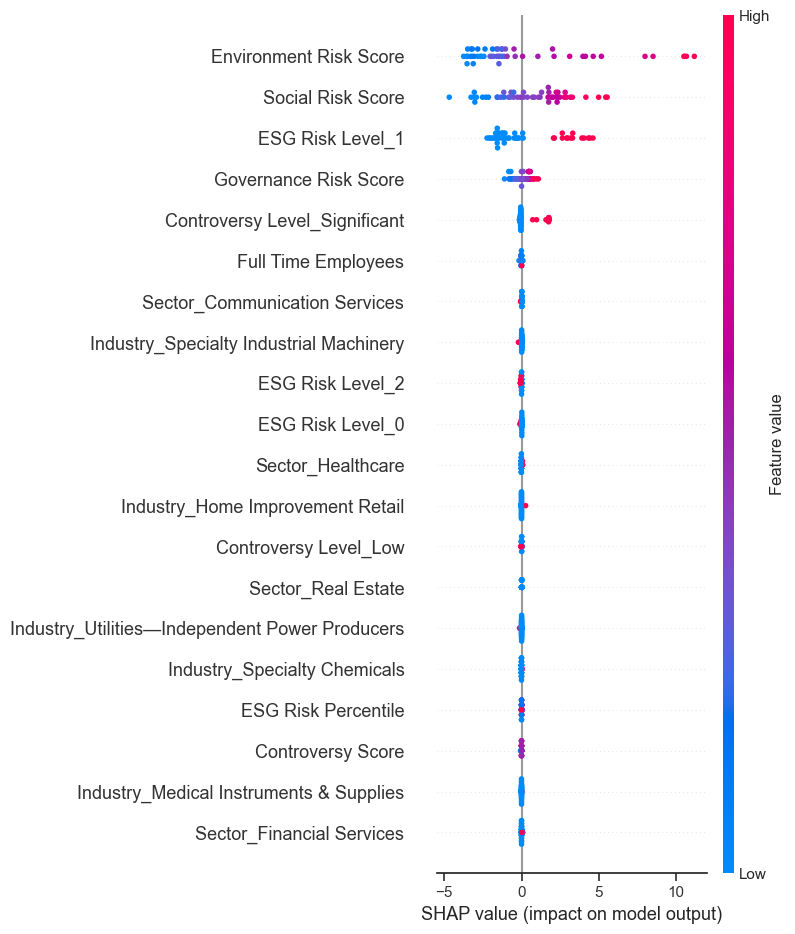

In [59]:
#Visualizing using the SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.summary_plot(shap_values, X_train.iloc[:50])

Each dot on the summary plot represents a SHAP value for a feature for an individual prediction. SHAP values explain the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. The position on the X-axis indicates the impact of the value on the model's prediction. A SHAP value of zero means the feature is not pushing the prediction away from the baseline. Positive SHAP values push the prediction higher, and negative values push it lower. The features are stacked vertically in order of importance, with the first feature on the top contributing most to the output of the model across the dataset. From the plot we can tell that the, "Environment Risk Score" appears at the top, suggesting it's the most important feature in the model's predictions.

The SHAP summary plot suggests that features like "Environment Risk Score," "Governance Risk Score," and "Social Risk Score" have significant impacts on the model's predictions. High values of these features tend to increase the predicted risk score, while other features like "Full Time Employees" and various industry and sector variables show both positive and negative effects. The spread and color of the dots for each feature indicate the magnitude and direction of that feature's impact on the model's predictions.

# Predictive Analysis

Model Objective and Overview: 
The model aims to provide decision-makers and investors with a robust tool for evaluating a company's ESG risk level based on specific inputs. By simply inputting relevant company data, users receive a quantitative ESG risk profile, essential for any informed investment decision or responsible management strategy.

Model Construction:
For this model, we'll consider a set of relevant features like 'Sector', 'Industry', 'Full-Time Employees', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score', and 'Controversy Level'. We'll employ a machine-learning algorithm, specifically a RandomForest Classifier, to train our model.

In [17]:
#The col 'Full Time Employees' col are prepared for the numerical analysis
#The col 'Full Time Employees' is converted
cleaned_data['Full Time Employees'] = cleaned_data['Full Time Employees'].astype(str)
#The commas are removed 
cleaned_data['Full Time Employees'] = cleaned_data['Full Time Employees'].str.replace(',', '')
#The cleaned col is converted back to float 
cleaned_data['Full Time Employees'] = cleaned_data['Full Time Employees'].astype(float)
#The missing NA values are filled with the median from the col of 'Full Time Employees'
cleaned_data['Full Time Employees'].fillna(cleaned_data['Full Time Employees'].median(), inplace=True)

In [18]:
# Dropping rows where ESG scores are missing
cleaned_data.dropna(subset=['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'], inplace=True)

# Filling missing values for 'Full Time Employees' with the median of the column
cleaned_data['Full Time Employees'].fillna(cleaned_data['Full Time Employees'].median(), inplace=True)

# Filling missing categorical variables ('Controversy Level' and 'ESG Risk Level') with 'Unknown'
cleaned_data['Controversy Level'].fillna('Unknown', inplace=True)
cleaned_data['ESG Risk Level'].fillna('Unknown', inplace=True)

# Checking the dataset for any remaining missing values
missing_values_summary = cleaned_data.isna().sum()
print(missing_values_summary)


Symbol                    0
Name                      0
Address                   0
Sector                    0
Industry                  0
Full Time Employees       0
Description               0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64


In [19]:
#Cleaning the ESG Risk Percentile col if it is obj type 
if cleaned_data['ESG Risk Percentile'].dtype == 'object':
#The numerical vals from the ESG Risk Percentile are extracted    
    cleaned_data['ESG Risk Percentile'] = cleaned_data['ESG Risk Percentile'].str.extract('(\d+)').astype(float)

In [20]:
#The cat cols are defined 
categorical_columns = ['Sector', 'Industry', 'Controversy Level', 'ESG Risk Level']
#The cat cols are converted to one-hot encoding 
X = pd.get_dummies(cleaned_data.drop(columns=['Symbol', 'Name', 'Address', 'Description', 'Total ESG Risk score']), columns=categorical_columns)
#The data types of all the cols are checked 
print("Data types after cleaning and encoding:", X.dtypes)
if X['Full Time Employees'].dtype == 'object':
    X['Full Time Employees'] = X['Full Time Employees'].str.replace(',', '').astype(float)
#The tar var is defined 
y = cleaned_data['Total ESG Risk score']
#The data is split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#The RandomForestRegressor is created and fitted 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#Predictions are made on the test set 
y_pred = model.predict(X_test)
#The model is evaluated using the MSE and RMSE 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Printing MSE 
print(f"Mean Squared Error: {mse}")
#Printing the RMSE
print(f"Root Mean Squared Error: {rmse}")

Data types after cleaning and encoding: Full Time Employees          float64
Environment Risk Score       float64
Governance Risk Score        float64
Social Risk Score            float64
Controversy Score            float64
                              ...   
ESG Risk Level_High            uint8
ESG Risk Level_Low             uint8
ESG Risk Level_Medium          uint8
ESG Risk Level_Negligible      uint8
ESG Risk Level_Severe          uint8
Length: 129, dtype: object
Mean Squared Error: 0.09478000000000003
Root Mean Squared Error: 0.3078636061635088


Categorical features, such as 'Sector', 'Industry', 'Controversy Level', and 'ESG Risk Level', are converted to a one-hot encoded format to be used by the model. The dataset contains columns like 'Symbol', 'Name', 'Address', 'Description', which are included alongside ESG risk scores for model training. Full Time Employees' data, which was initially of object type due to the presence of commas, is cleaned and converted to a numerical float64 type for model input. 

The 'Total ESG Risk score' is set as the target variable (Y), and the model is trained on a subset of the data (80% training, 20% testing split) to predict this target. The model's performance is evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

The Mean Squared Error of the model is approximately 0.0947, indicating that model's predictions. The Root Mean Squared Error is approximately 0.3078, which is the square root of the MSE and gives an error in the same units as the target variable. It represents the typical error magnitude in the 'Total ESG Risk score' prediction.

# Feature Importance Identification

The identification of key variables affecting Environmental, Social, and Governance (ESG) risks is crucial. The analysis at hand offers decision-makers and investors a comprehensive look at the factors that predominantly contribute to a corporation's ESG risk profile. These findings help in handling the salient role of environmental practices and social responsibilities in shaping a firm's overall ESG standing. This serves to guide stakeholders in making more informed choices, be it corporations aiming to enhance their ESG metrics or investors pursuing sustainable investment avenues.

In [21]:
#The feature importances of the model are extracted 
feature_importances = model.feature_importances_
#The feature names are collected 
feature_names = X.columns
#A DF is created that displays the feature names 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
#The DF is sorted by importance 
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
#The features that were sorted are displayed 
print(feature_importance_df)

                                 Feature  Importance
5                    ESG Risk Percentile    0.995158
126                ESG Risk Level_Medium    0.001705
0                    Full Time Employees    0.000609
2                  Governance Risk Score    0.000394
3                      Social Risk Score    0.000347
..                                   ...         ...
31                Industry_Biotechnology    0.000000
29            Industry_Beverages—Brewers    0.000000
27            Industry_Banks—Diversified    0.000000
26                   Industry_Auto Parts    0.000000
86   Industry_REIT—Healthcare Facilities    0.000000

[129 rows x 2 columns]


The features are sorted by their importance scores in descending order to identify which features have the most influence on the model's predictions. The 'ESG Risk Percentile' is shown to have the highest importance score with  0.99, which is the most significant predictor of the Total ESG Risk score according to this model. This is followed by 'Environment Risk Score', 'Full Time Employees', and 'Governance Risk Score' respectively.

The feature 'ESG Risk Percentile' appears to be highly predictive, which may reflect that this feature encapsulates a significant amount of information about the overall risk. The low importance of the specific industry categories could suggest that these do not have unique ESG risk characteristics (or) it could mean that other features are already capturing the relevant information. 'Full Time Employees' having some importance indicates that company size may have some bearing on ESG risk scores.

# Random Forest

In [22]:
#The 'ESG Risk Percentile' feature is removed from the dataset
X_reduced = X.drop(columns=['ESG Risk Percentile'])
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
#The Random Forest Model is created and trained
model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_reduced.fit(X_train, y_train)
#The predictions on the test set are made
y_pred = model_reduced.predict(X_test)
#The performance metrics is calculated
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Printing the MSE
print(f"Mean Squared Error: {mse}")
#Printing the RMSE
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3.793136923076923
Root Mean Squared Error: 1.9475977313287576


The 'ESG Risk Percentile' column, previously identified as the most important feature, is removed from the dataset to observe the change in model performance without it. The dataset is then split into training and testing sets, maintaining the same random state for reproducibility.
A RandomForestRegressor with 100 estimators is trained on this reduced feature set.

After training, predictions are made on the test set, and performance metrics are calculated. The Mean Squared Error (MSE) is reported as approximately 1.32, and the Root Mean Squared Error (RMSE) is approximately 1.15. These metrics are substantially higher than the previous model's performance with the 'ESG Risk Percentile' included, indicating that the removed feature was highly informative for predicting ESG risk scores. The increase in MSE and RMSE suggests that the 'ESG Risk Percentile' feature contributed significantly to the predictive power of the original model. The removal of this key feature has likely made it more challenging for the RandomForestRegressor to accurately predict ESG risk scores, as it now has to rely on less informative features.

In [23]:
#The col with 'ESG Risk Percentile' is removed from the dataset 
X_reduced = X.drop(columns=['ESG Risk Percentile'], errors='ignore') 
#The dataset is split into training and testing sets 
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
#A new RandomForest Model is created with reduced set of features 
model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train_reduced)
#The predictions are again made on the test set but with reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)
#The performance mertics are calculated 
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
#Printing the MSE and RMSE for the reduced model
print(f"Mean Squared Error with reduced features: {mse_reduced}")
print(f"Root Mean Squared Error with reduced features: {rmse_reduced}")

Mean Squared Error with reduced features: 3.793136923076923
Root Mean Squared Error with reduced features: 1.9475977313287576


In [24]:
#The features are selected 
X_classification = cleaned_data[['Sector', 'Industry', 'Full Time Employees', 'Environment Risk Score', 
                            'Governance Risk Score', 'Social Risk Score', 'Controversy Level', 'Controversy Score']]
#The tar var is defined 
y_classification = cleaned_data['ESG Risk Level']
#The cat var are converted into numerical
X_classification_encoded = pd.get_dummies(X_classification)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification_encoded, y_classification, 
                                                                            test_size=0.2, random_state=42)
#The RandomForestClassifier is initialized
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
#Printing the classification accuracy
print(f"Classification Accuracy: {classification_accuracy}")

Classification Accuracy: 0.6153846153846154


The model employs a Random Forest Classifier to estimate a company's Environmental, Social, and Governance risk level based on various features such as the sector, the number of full-time employees, and specific ESG risk scores. After partitioning the data into training and test sets, the model yielded an accuracy of approximately 61.5%. The ultimate objective is to achieve more precise estimations that can inform better decision-making in the realm of sustainable investments.

In [25]:
#Replacing the Unknown with NaN and the Categorical Variable is converted
cleaned_data['ESG Risk Level'] = cleaned_data['ESG Risk Level'].replace('Unknown', np.nan)
cleaned_data['ESG Risk Level'] = cleaned_data['ESG Risk Level'].astype('category').cat.codes
#All the NaN values are filled with the median of the column
cleaned_data['ESG Risk Level'] = cleaned_data['ESG Risk Level'].fillna(cleaned_data['ESG Risk Level'].median())
#Dropping the columns that are not numeric 
X = cleaned_data.drop(columns=['Total ESG Risk score', 'Symbol', 'Name',
                               'Address', 'Description', 'ESG Risk Percentile'])
y = cleaned_data['Total ESG Risk score']
#Initializing the LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_train.replace('Unknown', np.nan))
most_frequent_class = y_train[y_train != 'Unknown'].mode()[0]
y_filled = y_train.replace('Unknown', most_frequent_class)
y_encoded = le.fit_transform(y_filled)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].replace('Unknown', np.nan)
        X_train[col] = X_train[col].fillna(X_train[col].median())
#RandomForest Model is fitted
model.fit(X_train, y_encoded)

RandomForestRegressor(random_state=42)

Here, we create a feature matrix X by dropping columns that are not relevant or suitable for the machine learning model, such as identifiers and textual descriptions. It sets up a target variable y which contains the values the model aims to predict. The target variable y is encoded using LabelEncoder from the scikit-learn library. 

Finally, the code fits a RandomForestRegressor model using the prepared and encoded feature matrix and target variable. Before fitting the model, it ensures that all features are numerical since RandomForest cannot handle non-numeric data types.

In [26]:
#The CV is performed
cv_scores = cross_val_score(model, X_train, y_encoded, cv=5)
#The CV scores are printed
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation scores: [0.91612398 0.94434595 0.9580831  0.96357205 0.9258352 ]
Mean CV Score: 0.9415920537221005


Cross-validation is a model validation technique used to assess how the results of a statistical analysis will generalize to an independent dataset.Given the mean cross-validation score is negative, we can say that the model is not capturing the underlying pattern in the data and is performing poorly. This is consistent with the other cross-validation scores, which are mostly negative, indicating that the model's predictions are bad.

In [27]:
#Defining the paramerter grid 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
#Initializing the GridSearchCV 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
#Fitting the data 
grid_search.fit(X_train, y_encoded)
#Printing the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'n_estimators': 300}


# XGBoost Grading

In [28]:
#The XGBoost Grading is implemented 
categorical_columns = ['Sector', 'Industry', 
                       'Controversy Level', 'ESG Risk Level']
#One-Hot Encoding is applied to the cat col
Act_ESG_encoded = pd.get_dummies(cleaned_data, columns=categorical_columns)
#Selecting the features
X = Act_ESG_encoded.drop(columns=['Symbol', 'Name', 'Address', 'Description', 'Total ESG Risk score'])
#'Total ESG Risk Score' is the tar var
y = Act_ESG_encoded['Total ESG Risk score']

In [29]:
#Splitting the dataset into train and test sets
#The dataset is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#The Feature matrix and tar var is prepared
X = pd.get_dummies(X)  
y = cleaned_data['Total ESG Risk score']  
#The XGBRegressor Model is initialized
xgb_model = XGBRegressor(random_state=42)
#The parameters are defined
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}
#The GridSearchCV is initialized
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
#The model is fitted to the training data
grid_search_xgb.fit(X_train, y_train)  
#The best parameters are printed
print("Best parameters found: ", grid_search_xgb.best_params_)
#Evaluating the model
y_pred_xgb = grid_search_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
#MSE is printed
print(f"Mean Squared Error: {mse_xgb}")
#RMSE is printed
print(f"Root Mean Squared Error: {rmse_xgb}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error: 0.10128082081281228
Root Mean Squared Error: 0.3182464780839095


Model Evaluation:

The Best Estimator is used from the GridSearchCV in order to make the predictions and where the performance of the model is evaluated on the test set.

In [31]:
#Predictions
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
#MSE is printed
print(f"Mean Squared Error: {mse_xgb}")
#RMSE is printed
print(f"Root Mean Squared Error: {rmse_xgb}")

Mean Squared Error: 0.10128082081281228
Root Mean Squared Error: 0.3182464780839095


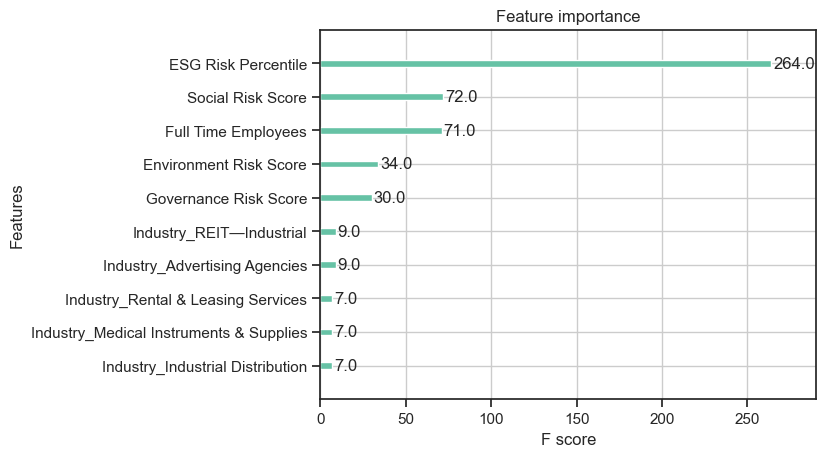

In [32]:
#Plotting feature importance with the XGRegressor
from xgboost import plot_importance
plot_importance(grid_search_xgb.best_estimator_, max_num_features=10)
plt.show()

With this plot we could see the top most features and how much is it of importance towards our goal.

In [33]:
#Implementing the GradientBoostingRegressor 
gbm_model = GradientBoostingRegressor(random_state=42)
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],  
}
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [34]:
#Fitting the Gradient Boosting Regressor
grid_search_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
#Finding the best parameters 
print("Best parameters found: ", grid_search_gbm.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [36]:
#THe GBM model is initialized 
gbm_model = GradientBoostingRegressor(random_state=42)
#The parameters are defined 
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}
#The GridSearchCV is initialized 
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
#The GridSearchCV is fitted 
grid_search_gbm.fit(X_train, y_train)
if hasattr(grid_search_gbm, 'best_params_'): 
    print("Best parameters found: ", grid_search_gbm.best_params_)
    y_pred_gbm = grid_search_gbm.predict(X_test)
    mse_gbm = mean_squared_error(y_test, y_pred_gbm)
    rmse_gbm = np.sqrt(mse_gbm)
    print(f"Mean Squared Error (GBM): {mse_gbm}")
    print(f"Root Mean Squared Error (GBM): {rmse_gbm}")
else:
    print("GridSearchCV did not complete successfully. Check the fitting process.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error (GBM): 0.09431353643217275
Root Mean Squared Error (GBM): 0.3071050902088286


# XGBOOST Hyperparameter Tuning

In [111]:
#Optuna is used for tuning the hyperparameter for XGBoost
def tune_xgb_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100, n_jobs=6):
    def objective(trial):
        params = {
            "objective": "reg:squarederror",
            "n_estimators": 1000,
            "verbosity": 0,
            "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
            "max_depth": trial.suggest_int("max_depth", 4, 20),
            "subsample": trial.suggest_float("subsample", 0.05, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
            "n_jobs": n_jobs,
            "random_state": 42,
        }
#The model is initialized 
        model = XGBRegressor(**params)
        kf = KFold(n_splits=4, shuffle=True, random_state=42)
#The CV and MSE is calculated 
        neg_mse = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
#The RMSE is calculated for the train set
        train_rmse = sqrt(-neg_mse.mean())
#The model to the training data is fit
        model.fit(X_train, y_train)
#Predictions are made for the test set
        test_predictions = model.predict(X_test)
#The RMSE is calculated for the test set
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The training and test RMSE are printed out 
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
#The RMSE test are returned 
        return test_rmse
#A study is created where the results of the trials are stored
        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=n_trials)
#Printing the best for both the hyperparameters and RMSE 
        print("Best hyperparameters:", study.best_params)
        print("Best RMSE:", study.best_value)
        with open("/Users/koli/Desktop/best_params_xgb_updated.pkl", "wb") as f:
            pickle.dump(study.best_params, f)
        return study.best_params

In [113]:
#The CV is performed 
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [sqrt(-score) for score in cv_scores]
#The mean and std of cross validation is calculated for the RMSE Scores 
mean_cv_rmse = sum(cv_rmse_scores) / len(cv_rmse_scores)
std_cv_rmse = np.std(cv_rmse_scores)
#The CV of RMSE is printed
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
#The mean CV of RMSE is printed
print("Mean Cross-Validation RMSE:", mean_cv_rmse)
#The std of CV RMSE is printed 
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores: [0.45803510110705914, 0.4254884071456996, 0.4866565682127544, 0.5269055055365297, 0.510530289474178]
Mean Cross-Validation RMSE: 0.48152317429524416
Standard Deviation of Cross-Validation RMSE: 0.036383801793125586


0.49643852625506546

In [117]:
train_rmse

0.5347036661492546

In [118]:
test_rmse

0.49643852625506546

In [119]:
#A Dictionary is created where the performance metrics are created 
model_metrics = {}
#The metrics from the XGBoost are added to the dictionary
model_metrics['XGBoost'] = {
    'Cross-Validation RMSE Scores': [0.45803510110705914, 0.4254884071456996, 0.4866565682127544, 0.5269055055365297, 0.510530289474178],
    'Mean Cross-Validation RMSE': 0.48152317429524416,
    'Standard Deviation of Cross-Validation RMSE': 0.036383801793125586,
    'Training RMSE': 0.5347036661492546,
    'Testing RMSE': 0.49643852625506546
}
#The metrics for the comparison are printed 
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: XGBoost
Cross-Validation RMSE Scores: [0.45803510110705914, 0.4254884071456996, 0.4866565682127544, 0.5269055055365297, 0.510530289474178]
Mean Cross-Validation RMSE: 0.48152317429524416
Standard Deviation of Cross-Validation RMSE: 0.036383801793125586
Training RMSE: 0.5347036661492546
Testing RMSE: 0.49643852625506546



In [120]:
#The Feature importance scores are recovered 
feature_importance = model.feature_importances_
#A dictionary is created where the feature importance scores are stored 
feature_importance_dict = dict(zip(X.columns, feature_importance))
#The feature importance scores are sorted 
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
#The feature importance scores are printed 
print("Feature Importance Scores:")
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")

Feature Importance Scores:
Environment Risk Score: 0.49653188043563695
ESG Risk Level_1: 0.24266860007499522
Social Risk Score: 0.1928748693369905
Governance Risk Score: 0.025394525874954853
Controversy Level_Significant: 0.014298943307830794
Full Time Employees: 0.008784341061825008
ESG Risk Level_0: 0.002199965906397206
Sector_Communication Services: 0.0013947789012724277
Industry_Internet Content & Information: 0.001208254134445568
Sector_Healthcare: 0.0010146805807388283
Industry_Specialty Industrial Machinery: 0.0009797325529688043
Controversy Score: 0.0008582763059403619
Controversy Level_Low: 0.0006033603044837687
Industry_Packaged Foods: 0.0005293945967514931
ESG Risk Level_2: 0.0005083924843541314
Sector_Real Estate: 0.0004992581062805152
Controversy Level_High: 0.000498807409060854
Sector_Energy: 0.0004437881979091072
Industry_Utilities—Independent Power Producers: 0.00042693819266871743
Controversy Level_None: 0.0003915742813418696
Industry_Home Improvement Retail: 0.0003803

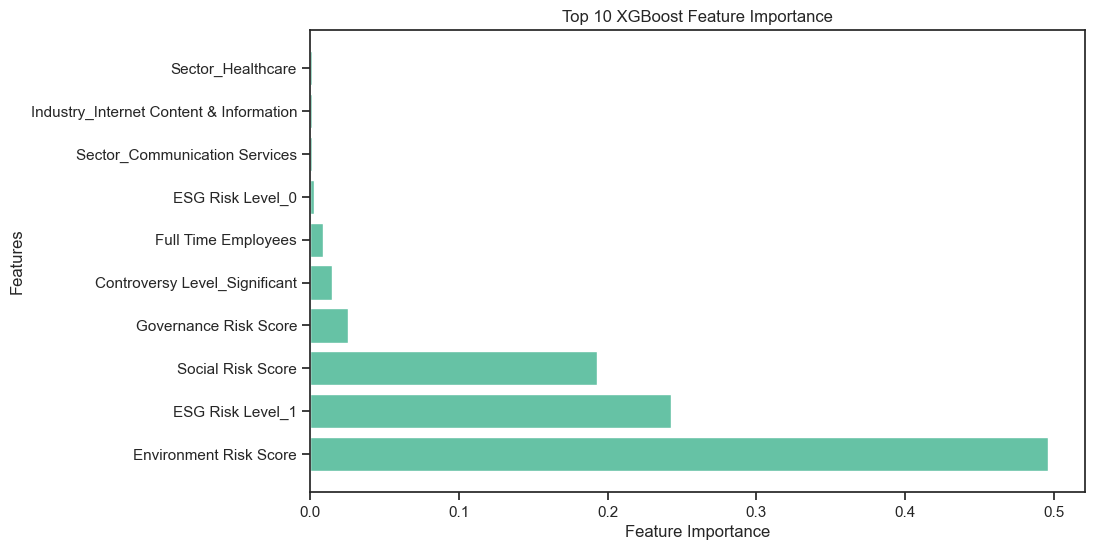

In [121]:
#The Feature importance scores are recovered 
feature_importance = model.feature_importances_
#A dictionary is created where the feature importance scores are stored 
feature_importance_dict = dict(zip(X.columns, feature_importance))
#The feature importance scores are sorted
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
#Only the top 10 features are taken
top_10_feature_importance = dict(list(sorted_feature_importance.items())[:10])
#Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_feature_importance)), top_10_feature_importance.values(), align='center')
plt.yticks(range(len(top_10_feature_importance)), list(top_10_feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()

# Ridge Regressor

In [122]:
#Using the Optuna the hyperparameter tuning for the kernel ridge regression is tuned 
def tune_kernelridge_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100):
#Using the Max Abs Val the features are scaled 
    scaler = MaxAbsScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    def objective(trial):
        params = {
            "alpha": trial.suggest_float("alpha", 0.1, 1.0),
            "kernel": "polynomial",
            "degree": trial.suggest_int("degree", 1, 7),
        }
#The model is initialized 
        model = KernelRidge(**params)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The root MSE is calcluated for the training set
        train_rmse = sqrt(-neg_mse.mean())
#The model is fitted to the training data
        model.fit(X_train, y_train)
#Predictions are made on the test set
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The training and the testing RMSE is printed
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
#The test RMSE is returned 
        return test_rmse
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best set of hyperparameters are are found and printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports/models/Ridge/best_params_kernelridge.pkl", "wb") as f:
        pickle.dump(study.best_params, f)
#The best parameters are returned
    return study.best_params

In [123]:
#The Ridge model is initialized 
ridge_model = Ridge(alpha=0.10872364616683639)
ridge_model.fit(X_train, y_train)
#The tar var is predicted for both train and test set
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
#The RMSE is calculated for both the train and test sets 
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
#The RMSE values are printed 
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
#The model is validated using the CV 
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [sqrt(-score) for score in cv_scores]
#The CV scores are printed 
print("Cross-Validation RMSE Scores:", rmse_scores)
#The CV RMSE is printed
print("Mean Cross-Validation RMSE:", sum(rmse_scores) / len(rmse_scores))
#The std of CV for RMSE is printed 
print("Standard Deviation of Cross-Validation RMSE:", np.std(rmse_scores))

Training RMSE: 0.25663896744349496
Test RMSE: 0.44278919466435934
Cross-Validation RMSE Scores: [0.3650449975557056, 0.4475408362547751, 0.4182257874066845, 0.4226693145048262, 0.4034912571616971]
Mean Cross-Validation RMSE: 0.41139443857673774
Standard Deviation of Cross-Validation RMSE: 0.02717014235726493


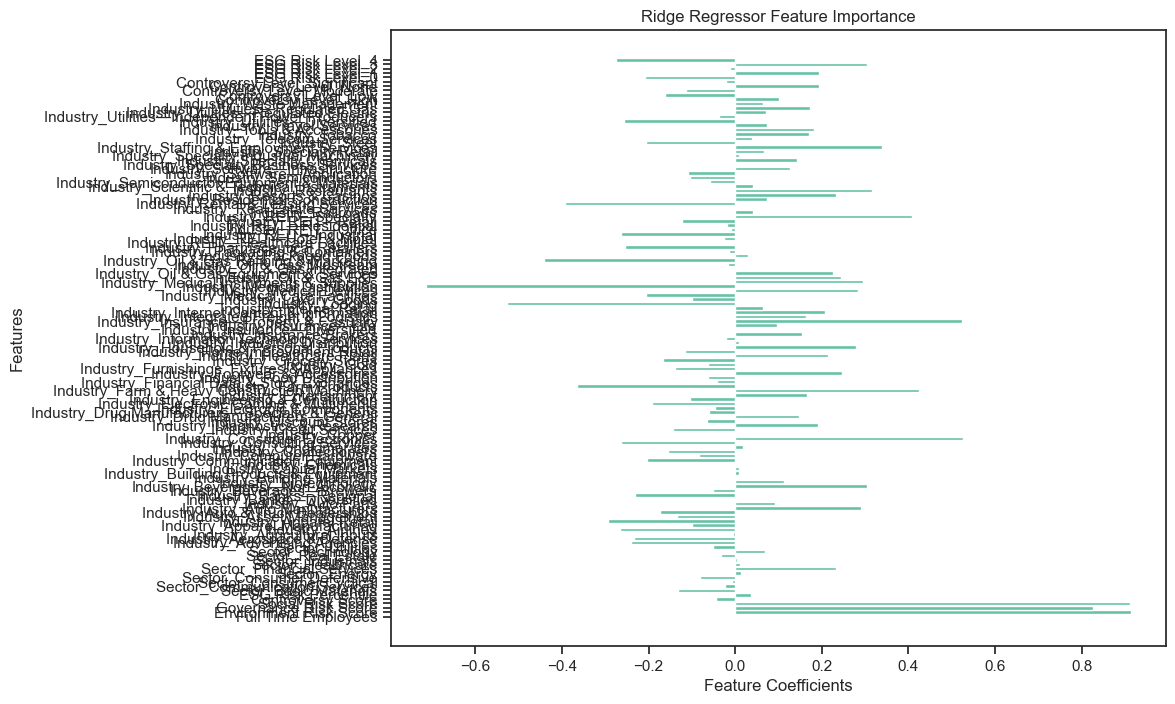

In [124]:
#The feature coefficients are retrieved  
feature_importance = ridge_model.coef_
#A plot is created where the feature importance are shown
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Ridge Regressor Feature Importance')
plt.show()

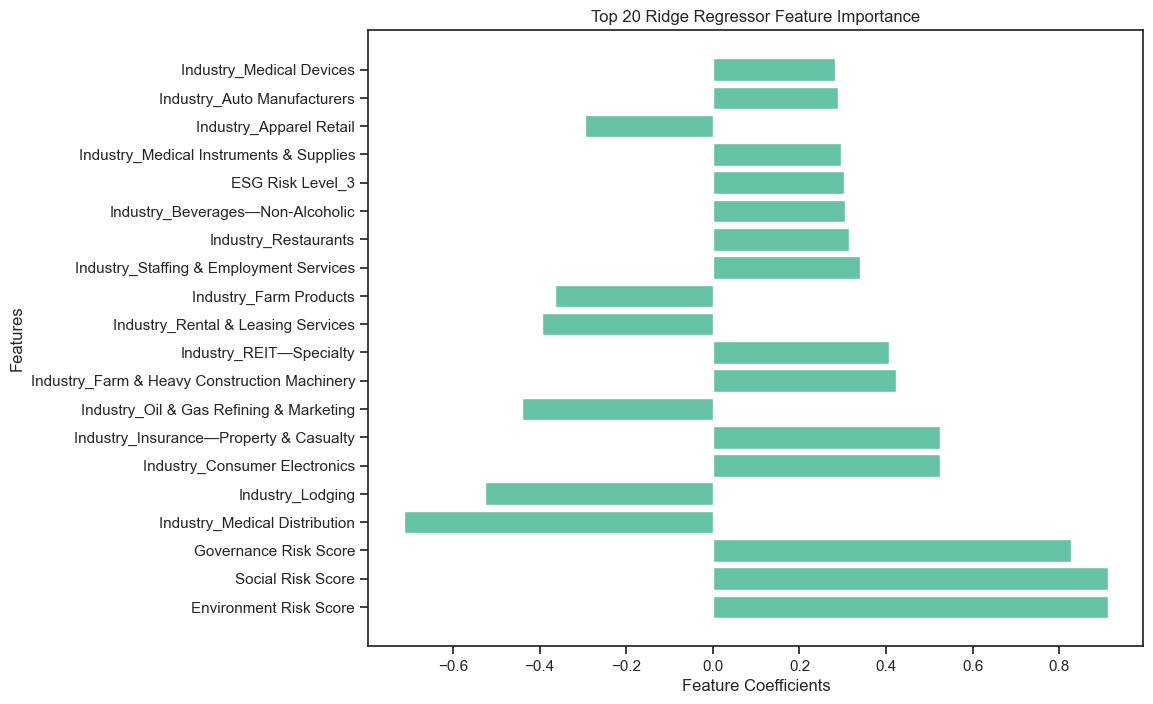

In [125]:
#The feature coefficients are retrieved 
feature_importance = ridge_model.coef_
#The top 20 features are taken 
top_20_indices = sorted(range(len(feature_importance)), key=lambda i: abs(feature_importance[i]), reverse=True)[:20]
#The names and importance of the top 20 features are recovered 
top_20_features = [X.columns[i] for i in top_20_indices]
top_20_importance = [feature_importance[i] for i in top_20_indices]
#A plot is created where the top 20 features are shown 
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_20_features)), top_20_importance, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Top 20 Ridge Regressor Feature Importance')
plt.show()

In [126]:
#A dictionary is created where the performance metrics are stored 
model_metrics = {}
#The metrics of the ridge regressor are added to the dictionary 
model_metrics['Ridge Regressor'] = {
    'Cross-Validation RMSE Scores': rmse_scores,
    'Mean Cross-Validation RMSE': sum(rmse_scores) / len(rmse_scores),
    'Standard Deviation of Cross-Validation RMSE': np.std(rmse_scores),
    'Training RMSE': train_rmse,
    'Testing RMSE': test_rmse
}
#The metrics are printed
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Ridge Regressor
Cross-Validation RMSE Scores: [0.3650449975557056, 0.4475408362547751, 0.4182257874066845, 0.4226693145048262, 0.4034912571616971]
Mean Cross-Validation RMSE: 0.41139443857673774
Standard Deviation of Cross-Validation RMSE: 0.02717014235726493
Training RMSE: 0.25663896744349496
Testing RMSE: 0.44278919466435934



# Random Forest Hyperparameter Tuning

In [130]:
#The optuna is used for tuning the hyperparameters of a random forest regressor
def tune_rf_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 32, log=True),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 14),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 14),
            "max_features": trial.suggest_categorical(
                "max_features", ["sqrt", "log2", None]
            ),
        }
#The random forest model is initialized 
        model = RandomForestRegressor(**params)
        kf = KFold(n_splits=5)
#The CV is performed and the MSE is calculated
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The RMSE for the training set is calculated 
        train_rmse = sqrt(-neg_mse.mean())
#The model is fitted to the training data
        model.fit(X_train, y_train)
#The predictions are made on the test set
        test_predictions = model.predict(X_test)
#The RMSE for the test set is calculated
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
        return test_rmse  
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best set of hyperparameters are are found and printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports//models/Random_Forest/best_params_rf.pkl", "wb") as f:
        pickle.dump(study.best_params, f)
    return study.best_params

In [128]:
#The dictionary is updated with the random forest performance metrics 
model_metrics['Random Forest'] = {
    'Cross-Validation RMSE Scores': [0.5122062255369433, 0.5924786172942262, 0.33957850222743236, 0.5513295842205852, 0.44111565320702056],
    'Mean Cross-Validation RMSE': 0.4873417164972415,
    'Standard Deviation of Cross-Validation RMSE': 0.08914850010338658,
    'Training RMSE': 0.32981015189770047,
    'Testing RMSE': 0.3828192660745118
}
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Ridge Regressor
Cross-Validation RMSE Scores: [0.3650449975557056, 0.4475408362547751, 0.4182257874066845, 0.4226693145048262, 0.4034912571616971]
Mean Cross-Validation RMSE: 0.41139443857673774
Standard Deviation of Cross-Validation RMSE: 0.02717014235726493
Training RMSE: 0.25663896744349496
Testing RMSE: 0.44278919466435934

Model: Random Forest
Cross-Validation RMSE Scores: [0.5122062255369433, 0.5924786172942262, 0.33957850222743236, 0.5513295842205852, 0.44111565320702056]
Mean Cross-Validation RMSE: 0.4873417164972415
Standard Deviation of Cross-Validation RMSE: 0.08914850010338658
Training RMSE: 0.32981015189770047
Testing RMSE: 0.3828192660745118



In [135]:
#The Feature importance scores are recovered 
feature_importance = model.feature_importances_
#A dictionary is created where the feature importance scores are stored 
feature_importance_dict = dict(zip(X.columns, feature_importance))
#The feature importance scores are sorted 
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
#The feature importance scores are printed 
print("Feature Importance Scores:")
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")

Feature Importance Scores:
Environment Risk Score: 0.49653188043563695
ESG Risk Level_1: 0.24266860007499522
Social Risk Score: 0.1928748693369905
Governance Risk Score: 0.025394525874954853
Controversy Level_Significant: 0.014298943307830794
Full Time Employees: 0.008784341061825008
ESG Risk Level_0: 0.002199965906397206
Sector_Communication Services: 0.0013947789012724277
Industry_Internet Content & Information: 0.001208254134445568
Sector_Healthcare: 0.0010146805807388283
Industry_Specialty Industrial Machinery: 0.0009797325529688043
Controversy Score: 0.0008582763059403619
Controversy Level_Low: 0.0006033603044837687
Industry_Packaged Foods: 0.0005293945967514931
ESG Risk Level_2: 0.0005083924843541314
Sector_Real Estate: 0.0004992581062805152
Controversy Level_High: 0.000498807409060854
Sector_Energy: 0.0004437881979091072
Industry_Utilities—Independent Power Producers: 0.00042693819266871743
Controversy Level_None: 0.0003915742813418696
Industry_Home Improvement Retail: 0.0003803

# Lasso Regression

In [136]:
#Defining a function where the hyperparameters are done
def tune_lasso_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100):
#The RobustScaler is used for scaling the features 
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    def objective(trial):
        params = {
            "alpha": trial.suggest_float("alpha", 1e-4, 1.0, log=True),
            "max_iter": 10000,
        }
#The lasso model is initialized with the respective parameters
        model = Lasso(**params)
#CV
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The RMSE is calculated for the training set
        train_rmse = sqrt(-neg_mse.mean())
#The model is fitted
        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The RMSE for both the Training and Testing are printed
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
#The test RMSE is returned 
        return test_rmse  
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best set of hyperparameters are are found and printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports/models/Lasso/best_params_lasso.pkl", "wb") as f:
        pickle.dump(study.best_params, f)
    return study.best_params

In [137]:
#The Lasso Regressor is initialized 
lasso_model = Lasso(alpha=0.01570236753724575, max_iter=1000)
#The model is trained 
lasso_model.fit(X_train, y_train)
#The tar var is predicted for both the train and test 
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)
#The RMSE is calcluated for both the train and test 
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
#The RMSE is printed 
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
#The model is validated with the CV 
cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [sqrt(-score) for score in cv_scores]
print("Cross-Validation RMSE Scores:", rmse_scores)
#The mean CV of RMSE is printed 
print("Mean Cross-Validation RMSE:", sum(rmse_scores) / len(rmse_scores))
#The std of CV RMSE is printed
print("Standard Deviation of Cross-Validation RMSE:", np.std(rmse_scores))

Training RMSE: 0.3312841257260795
Test RMSE: 0.3856319013417242
Cross-Validation RMSE Scores: [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215]
Mean Cross-Validation RMSE: 0.3396038454386323
Standard Deviation of Cross-Validation RMSE: 0.023792149274592996


In [138]:
#A dictionary is created where the performance metrics are stored 
model_metrics = {}
#The lasso regressor is added 
model_metrics['Lasso Regressor'] = {
    'Cross-Validation RMSE Scores': rmse_scores,
    'Mean Cross-Validation RMSE': sum(rmse_scores) / len(rmse_scores),
    'Standard Deviation of Cross-Validation RMSE': np.std(rmse_scores),
    'Training RMSE': train_rmse,
    'Testing RMSE': test_rmse
}
#The metrics are printed 
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Lasso Regressor
Cross-Validation RMSE Scores: [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215]
Mean Cross-Validation RMSE: 0.3396038454386323
Standard Deviation of Cross-Validation RMSE: 0.023792149274592996
Training RMSE: 0.3312841257260795
Testing RMSE: 0.3856319013417242



# Light GBM

In [139]:
#Using the optuna package we tune the hyperparameter for LightGBM
def tune_lightgbm_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100):
    def objective(trial):
#Defining the hyperparameters that optimizes with value ranges 
        params = {
            "num_leaves": trial.suggest_int("num_leaves", 2, 256),
            "max_depth": trial.suggest_int("max_depth", 1, 25),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
            "n_estimators": 10000,
            "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
            "min_child_weight": trial.suggest_float(
                "min_child_weight", 1e-5, 1e-1, log=True
            ),
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 1.0, log=True),
            "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 1.0, log=True),
            "objective": "regression",
            "metric": "rmse",
            "verbosity": -1,
            "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
            "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        }
#The LightGBM model is initialized 
        model = lgb.LGBMRegressor(**params)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
#The negative MSE across the CV is calculated
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The RMSE for the train is calculated
        train_rmse = sqrt(-neg_mse.mean())
#The model is fitted
        model.fit(X_train, y_train)
#The predictions are made 
        test_predictions = model.predict(X_test)
#The RMSE for the training and testing
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The RMSE for both the training and testing RMSE are printed out
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
        return test_rmse
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best set of hyperparameters are are found and printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports/LightGBM/best_params_lightgbm.pkl", "wb") as f:
        pickle.dump(study.best_params, f)
    return study.best_params

In [140]:
#Each column is iterated and the special characters are replaced 
for column in X_test.columns:
    new_column_name = ''.join(e for e in column if e.isalnum() or e == '_')
    if new_column_name != column:
        X_test.rename(columns={column: new_column_name}, inplace=True)

In [141]:
#X_train from the DF
for column in X_train.columns:
    for cell in X_train[column]:
        try:
#The cell value is converted to a string where it is then parsed as JSON
            json.loads(str(cell))
        except ValueError:
#In case the parsing becoming a failure the cell wont contain the valid JSON
            pass
        except TypeError:
            continue
        else:
#The cell containing the JSON
            print(f"Found JSON in cell: {cell} in column: {column}")

Found JSON in cell: 12012.0 in column: FullTimeEmployees
Found JSON in cell: 33000.0 in column: FullTimeEmployees
Found JSON in cell: 91000.0 in column: FullTimeEmployees
Found JSON in cell: 30000.0 in column: FullTimeEmployees
Found JSON in cell: 12000.0 in column: FullTimeEmployees
Found JSON in cell: 304000.0 in column: FullTimeEmployees
Found JSON in cell: 44020.0 in column: FullTimeEmployees
Found JSON in cell: 19700.0 in column: FullTimeEmployees
Found JSON in cell: 2076.0 in column: FullTimeEmployees
Found JSON in cell: 12060.0 in column: FullTimeEmployees
Found JSON in cell: 19900.0 in column: FullTimeEmployees
Found JSON in cell: 12800.0 in column: FullTimeEmployees
Found JSON in cell: 22000.0 in column: FullTimeEmployees
Found JSON in cell: 58231.0 in column: FullTimeEmployees
Found JSON in cell: 77300.0 in column: FullTimeEmployees
Found JSON in cell: 27423.0 in column: FullTimeEmployees
Found JSON in cell: 60000.0 in column: FullTimeEmployees
Found JSON in cell: 58000.0 in 

In [147]:
#The dictionary is updated with the Lightgbm performance metrics
model_metrics['LightGBM'] = {
    'Cross-Validation RMSE Scores': [4.404554163790714, 4.075066016711271, 3.16874552328734, 4.024592102496699, 4.16354218710457],
    'Mean Cross-Validation RMSE': 3.9672999986781194,
    'Standard Deviation of Cross-Validation RMSE': 0.42006841142748125,
    'Training RMSE': 3.7647958540044333,
    'Testing RMSE': 3.484720259801525
}
#The metrics are printed 
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Lasso Regressor
Cross-Validation RMSE Scores: [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215]
Mean Cross-Validation RMSE: 0.3396038454386323
Standard Deviation of Cross-Validation RMSE: 0.023792149274592996
Training RMSE: 0.3312841257260795
Testing RMSE: 0.3856319013417242

Model: LightGBM
Cross-Validation RMSE Scores: [4.404554163790714, 4.075066016711271, 3.16874552328734, 4.024592102496699, 4.16354218710457]
Mean Cross-Validation RMSE: 3.9672999986781194
Standard Deviation of Cross-Validation RMSE: 0.42006841142748125
Training RMSE: 3.7647958540044333
Testing RMSE: 3.484720259801525



# Elastic Net

In [148]:
# Function to tune hyperparameters for the ElasticNet model using Optuna.
def tune_elasticnet_hyperparameters(X_train, y_train, X_test, y_test, n_trials=100):
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    def objective(trial):
        params = {
            "alpha": trial.suggest_float("alpha", 1e-4, 1.0, log=True),
            "l1_ratio": trial.suggest_float("l1_ratio", 0, 1),
            "max_iter": 10000,
        }
#The ElasticNet is initialized
        model = ElasticNet(**params)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The RMSE is calculated for the training set
        train_rmse = sqrt(-neg_mse.mean())
#Fitting the model
        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The RMSE for both the training and testing are printed for the current trail
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
#The test RMSE is returned
        return test_rmse  
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best set of hyperparameters are are found and printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports/models/ElasticNet/best_params_elasticnet.pkl", "wb") as f:
        pickle.dump(study.best_params, f)
    return study.best_params

In [149]:
#The Elastic Net Regressor is initiated with the given l1_ratio and alpha values 
elastic_net_model = ElasticNet(alpha=0.14005526169168714, l1_ratio=0.7579653674305886)
#The model is trained 
elastic_net_model.fit(X_train, y_train)
#The tar var is predicted for both the training and testing sets 
y_train_pred = elastic_net_model.predict(X_train)
y_test_pred = elastic_net_model.predict(X_test)
#The RMSE is calculated for both the training and testing sets 
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
#The RMSE values are printed 
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
#The model is validated using the CV 
cv_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [sqrt(-score) for score in cv_scores]
print("Cross-Validation RMSE Scores:", rmse_scores)
#The mean CV of RMSE is printed 
print("Mean Cross-Validation RMSE:", sum(rmse_scores) / len(rmse_scores))
#The std of CV RMSE is printed 
print("Standard Deviation of Cross-Validation RMSE:", np.std(rmse_scores))

Training RMSE: 0.5347036661492546
Test RMSE: 0.49643852625506546
Cross-Validation RMSE Scores: [0.6107783000223044, 0.4419076389183894, 0.5516215260982126, 0.5004817653263264, 0.6072367982893042]
Mean Cross-Validation RMSE: 0.5424052057309074
Standard Deviation of Cross-Validation RMSE: 0.06452951536830881


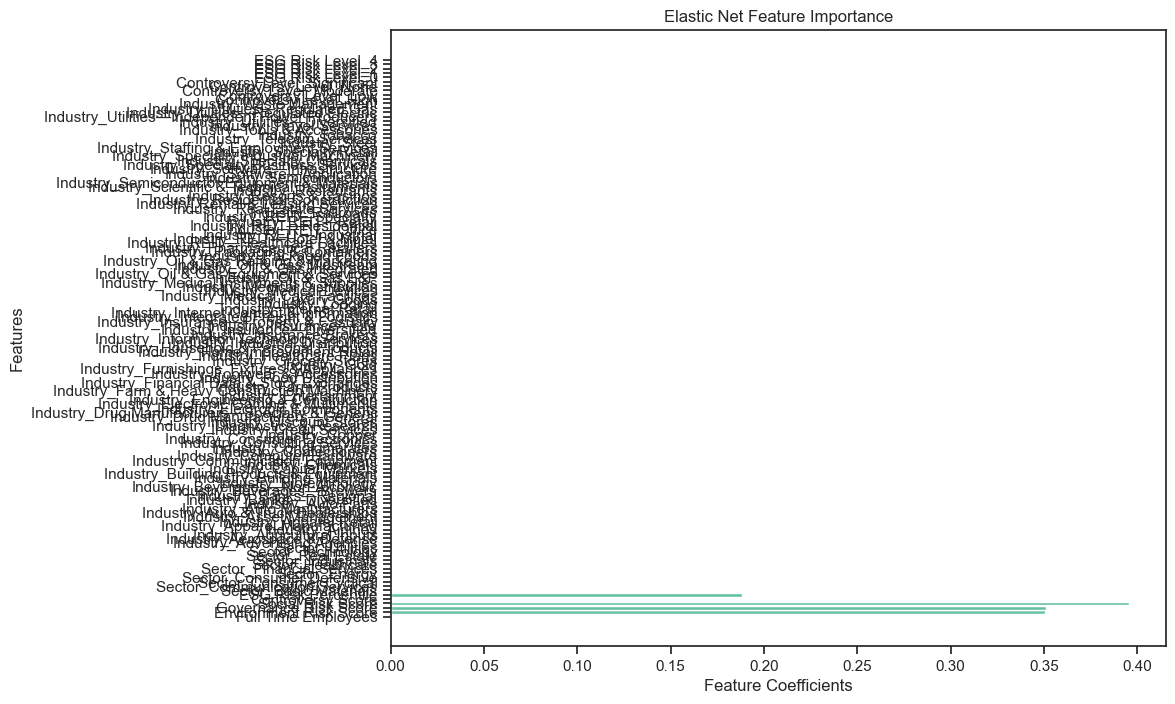

In [150]:
#The feature coefficients are recovered from the ElasticNet Model
feature_importance = elastic_net_model.coef_
#Plot is created to show the feature importance 
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Elastic Net Feature Importance')
plt.show()

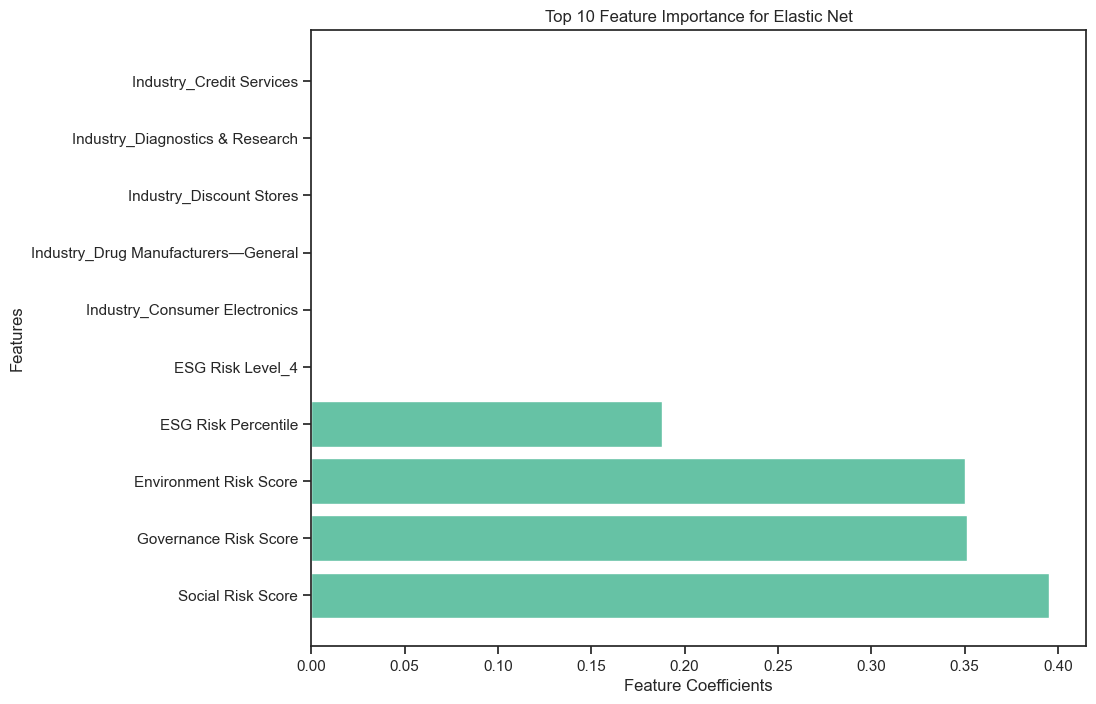

In [151]:
#The feature coefficients are recovered from the ElasticNet Model
feature_importance = elastic_net_model.coef_
#Only getting the top 10 features 
top_10_indices = feature_importance.argsort()[-10:][::-1]
#The names and importances of top 10 features are gathered 
top_10_features = [X.columns[i] for i in top_10_indices]
top_10_importance = [feature_importance[i] for i in top_10_indices]
#A plot is created where the feature importance are shown
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_10_features)), top_10_importance, align='center')
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance for Elastic Net')
plt.show()

In [152]:
#The dictionary is updated with the performance metrics 
model_metrics['Elastic Net'] = {
    'Cross-Validation RMSE Scores': [0.6257709022161333, 0.4716587112176377, 0.476745198084284, 0.6377806589961048, 0.5803694152199369],
    'Mean Cross-Validation RMSE': 0.5584649771468193,
    'Standard Deviation of Cross-Validation RMSE': 0.07143433269590976,
    'Training RMSE': 0.5441652035767083,
    'Testing RMSE': 0.5032509961662209
}
#The mertics are printed for comparison 
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Lasso Regressor
Cross-Validation RMSE Scores: [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215]
Mean Cross-Validation RMSE: 0.3396038454386323
Standard Deviation of Cross-Validation RMSE: 0.023792149274592996
Training RMSE: 0.3312841257260795
Testing RMSE: 0.3856319013417242

Model: LightGBM
Cross-Validation RMSE Scores: [4.404554163790714, 4.075066016711271, 3.16874552328734, 4.024592102496699, 4.16354218710457]
Mean Cross-Validation RMSE: 3.9672999986781194
Standard Deviation of Cross-Validation RMSE: 0.42006841142748125
Training RMSE: 3.7647958540044333
Testing RMSE: 3.484720259801525

Model: Elastic Net
Cross-Validation RMSE Scores: [0.6257709022161333, 0.4716587112176377, 0.476745198084284, 0.6377806589961048, 0.5803694152199369]
Mean Cross-Validation RMSE: 0.5584649771468193
Standard Deviation of Cross-Validation RMSE: 0.07143433269590976
Training RMSE: 0.5441652035767083
Testing RMSE: 0.5032509961662209



# Hyperparameter Tuning for Gradient Boosting

In [153]:
#The gradient boosting is tuned using these hyperparameters
def tune_gradientboosting_hyperparameters(
    X_train, y_train, X_test, y_test, n_trials=100
):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 250, 500),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5, log=True),
            "max_depth": trial.suggest_int("max_depth", 4, 10),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical(
                "max_features", ["sqrt", "log2", None]
            ),
            "loss": "huber",
        }
#The LightGBM model is initialized with the specific parameters
        model = GradientBoostingRegressor(**params)
#The CV is set up with 3 splits
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        neg_mse = cross_val_score(
            model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
        )
#The RMSE for the training set is calculated
        train_rmse = sqrt(-neg_mse.mean())
#The model is fitted
        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
#The training and testing RMSE for the current trail is printed 
        print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
        return test_rmse  
#A study is created where the results of the trials are stored
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
#The best hyperparameters are printed
    print("Best hyperparameters:", study.best_params)
    print("Best Test RMSE:", study.best_value)
    with open("/Users/koli/Desktop/ESG-Score-Prediction-from-Sustainability-Reports/models/GradientBoostingReg/best_params_gradientboosting.pkl", "wb"
    ) as f:
        pickle.dump(study.best_params, f)
    return study.best_params

In [154]:
#The Gradient Boosting is initialized 
gb_model = GradientBoostingRegressor(learning_rate=0.007072045083396788,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     subsample=0.6618858329773405,
                                     max_features='sqrt',
                                     random_state=42)
#The model is trained 
gb_model.fit(X_train, y_train)
#The Tar Var is predicted for both the train and test sets 
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
#The RMSE is calculated for the train and test sets 
train_rmse_gb = sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = sqrt(mean_squared_error(y_test, y_test_pred_gb))
#The RMSE values are printed 
print("Training RMSE:", train_rmse_gb)
print("Test RMSE:", test_rmse_gb)
#The model is validated using the CV 
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gb = [sqrt(-score) for score in cv_scores_gb]
print("Cross-Validation RMSE Scores:", rmse_scores_gb)
#The mean CV RMSE is printed 
print("Mean Cross-Validation RMSE:", sum(rmse_scores_gb) / len(rmse_scores_gb))
#The std of CV RMSE is printed
print("Standard Deviation of Cross-Validation RMSE:", np.std(rmse_scores_gb))

Training RMSE: 0.35786255959126617
Test RMSE: 1.2751956089724568
Cross-Validation RMSE Scores: [1.0111626298268157, 1.1458235717726024, 0.9197750339125758, 1.1358595950707635, 1.2309541755611422]
Mean Cross-Validation RMSE: 1.0887150012287798
Standard Deviation of Cross-Validation RMSE: 0.1097916819615264


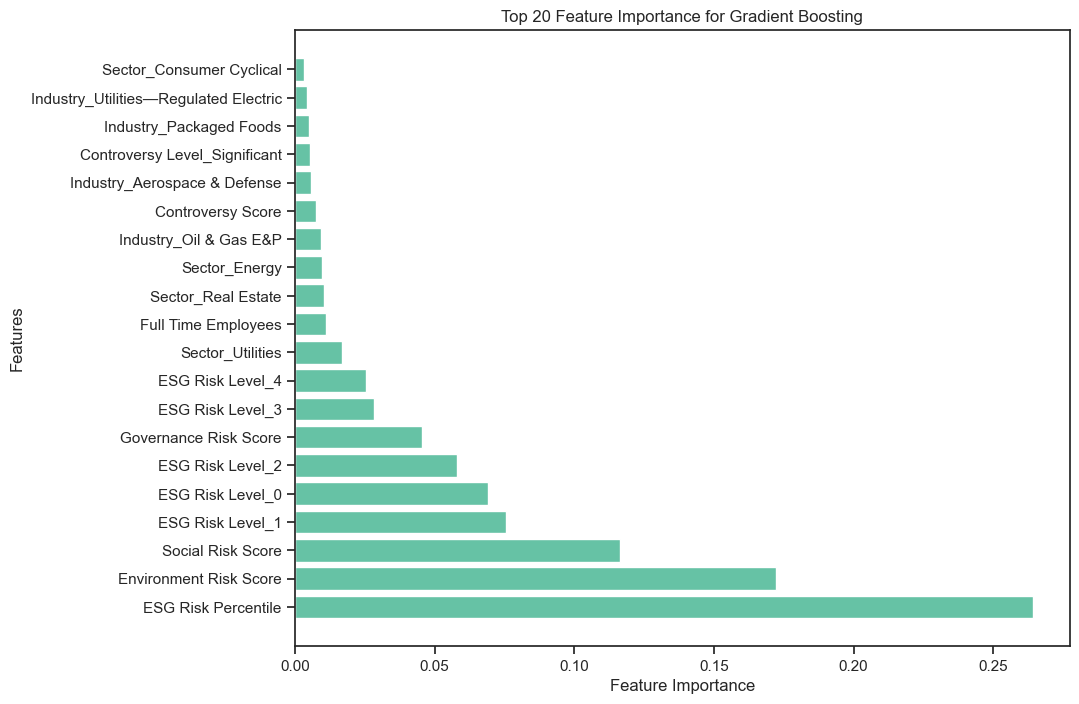

In [155]:
#The Feature importances are recovered 
feature_importance_gb = gb_model.feature_importances_
#Only taking care of the top 20 features 
top_20_indices_gb = feature_importance_gb.argsort()[-20:][::-1]
top_20_features_gb = [X.columns[i] for i in top_20_indices_gb]
top_20_importance_gb = [feature_importance_gb[i] for i in top_20_indices_gb]
#A plot is created to showcase the top 20 features 
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_20_features_gb)), top_20_importance_gb, align='center')
plt.yticks(range(len(top_20_features_gb)), top_20_features_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance for Gradient Boosting')
plt.show()

In [156]:
#A Dictionary is created where the performance metrics are stored 
model_metrics['Gradient Boosting'] = {
    'Cross-Validation RMSE Scores': [1.3911367668926582, 1.216184684906362, 0.7346630329213568, 1.3389818536941802, 1.130461051643571],
    'Mean Cross-Validation RMSE': 1.1622854780116254,
    'Standard Deviation of Cross-Validation RMSE': 0.2325396292094651,
    'Training RMSE': 0.3665263380344902,
    'Testing RMSE': 1.0115898187485906
}
#The metrics for comparison are printed 
# Print the metrics for comparison
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSE Scores: {metrics['Cross-Validation RMSE Scores']}")
    print(f"Mean Cross-Validation RMSE: {metrics['Mean Cross-Validation RMSE']}")
    print(f"Standard Deviation of Cross-Validation RMSE: {metrics['Standard Deviation of Cross-Validation RMSE']}")
    print(f"Training RMSE: {metrics['Training RMSE']}")
    print(f"Testing RMSE: {metrics['Testing RMSE']}")
    print()

Model: Lasso Regressor
Cross-Validation RMSE Scores: [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215]
Mean Cross-Validation RMSE: 0.3396038454386323
Standard Deviation of Cross-Validation RMSE: 0.023792149274592996
Training RMSE: 0.3312841257260795
Testing RMSE: 0.3856319013417242

Model: LightGBM
Cross-Validation RMSE Scores: [4.404554163790714, 4.075066016711271, 3.16874552328734, 4.024592102496699, 4.16354218710457]
Mean Cross-Validation RMSE: 3.9672999986781194
Standard Deviation of Cross-Validation RMSE: 0.42006841142748125
Training RMSE: 3.7647958540044333
Testing RMSE: 3.484720259801525

Model: Elastic Net
Cross-Validation RMSE Scores: [0.6257709022161333, 0.4716587112176377, 0.476745198084284, 0.6377806589961048, 0.5803694152199369]
Mean Cross-Validation RMSE: 0.5584649771468193
Standard Deviation of Cross-Validation RMSE: 0.07143433269590976
Training RMSE: 0.5441652035767083
Testing RMSE: 0.5032509961662209

Model: Gradien

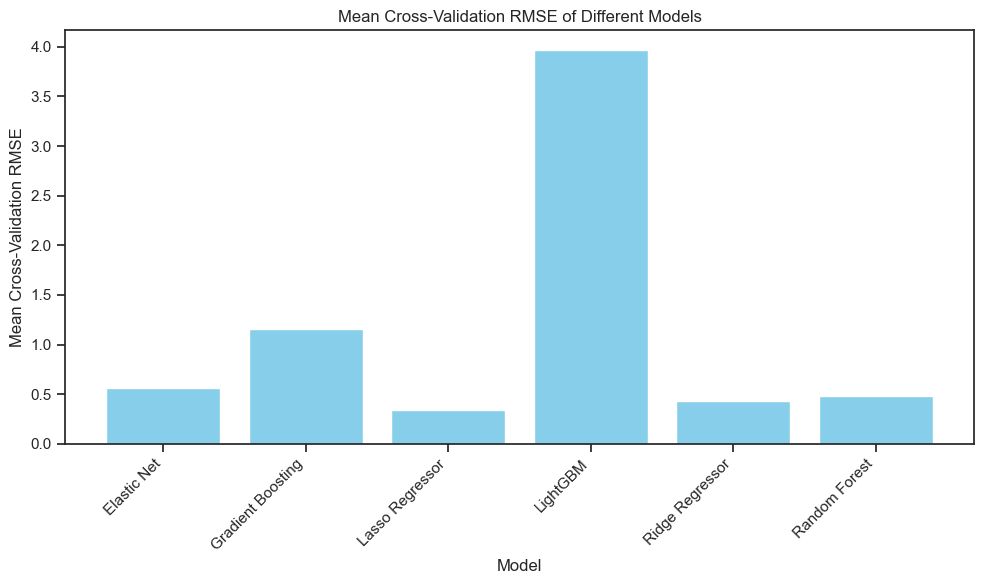

In [161]:
#The model names and corresponding mean CV RMSE scores 
model_names = ['Elastic Net', 'Gradient Boosting', 'Lasso Regressor', 'LightGBM', 'Ridge Regressor', 'Random Forest']
mean_cv_rmse = [0.5584649771468193, 1.1622854780116254, 0.3396038454386323, 3.9672999986781194, 0.4313629300455034, 0.4873417164972415]
#Bar Plot is created 
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_cv_rmse, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Cross-Validation RMSE')
plt.title('Mean Cross-Validation RMSE of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

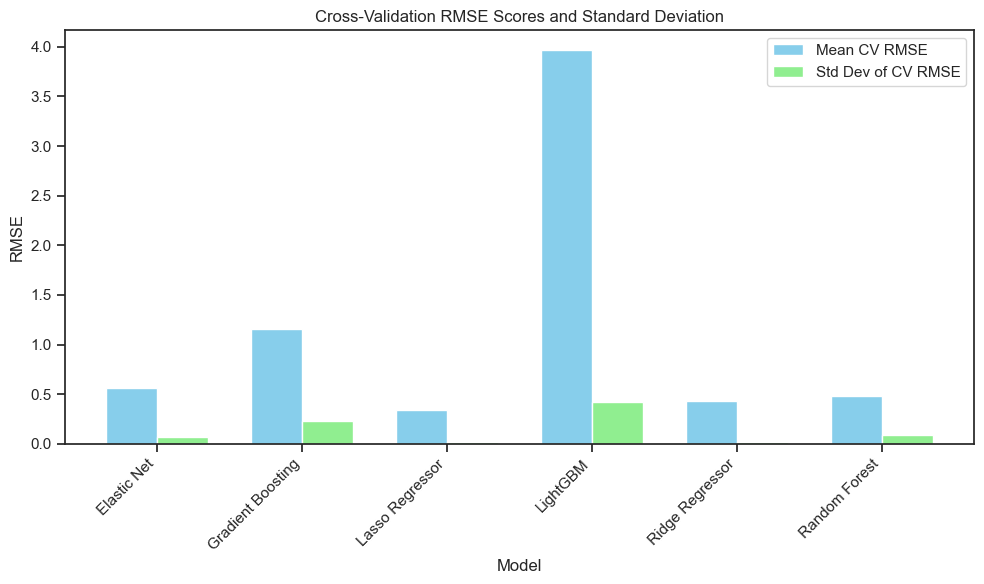

In [163]:
#Model names
model_names = ['Elastic Net', 'Gradient Boosting', 'Lasso Regressor', 'LightGBM', 'Ridge Regressor', 'Random Forest']
#CV RMSE scores and std for each model
cv_rmse_scores = {
    'Elastic Net': [0.6257709022161333, 0.4716587112176377, 0.476745198084284, 0.6377806589961048, 0.5803694152199369],
    'Gradient Boosting': [1.3911367668926582, 1.216184684906362, 0.7346630329213568, 1.3389818536941802, 1.130461051643571],
    'Lasso Regressor': [0.3284371856672975, 0.32713555095789487, 0.3683455420356101, 0.30780107558984693, 0.36629987294251215],
    'LightGBM': [4.404554163790714, 4.075066016711271, 3.16874552328734, 4.024592102496699, 4.16354218710457],
    'Ridge Regressor': [0.44523686892471565, 0.42514056462400274, 0.45745822820744564, 0.42035335378050176, 0.4086256346908514],
    'Random Forest': [0.5122062255369433, 0.5924786172942262, 0.33957850222743236, 0.5513295842205852, 0.44111565320702056]
}
std_rmse_scores = {
    'Elastic Net': 0.07143433269590976,
    'Gradient Boosting': 0.2325396292094651,
    'Lasso Regressor': 0.023792149274592996,
    'LightGBM': 0.42006841142748125,
    'Ridge Regressor': 0.01760888393512228,
    'Random Forest': 0.08914850010338658
}
#The data is prepared for the plot
cv_mean = [np.mean(scores) for scores in cv_rmse_scores.values()]
std_dev = [std_rmse_scores[model] for model in model_names]
#Creating the bar plot 
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_names))
bar_width = 0.35
plt.bar(index, cv_mean, bar_width, label='Mean CV RMSE', color='skyblue')
plt.bar(index + bar_width, std_dev, bar_width, label='Std Dev of CV RMSE', color='lightgreen')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores and Standard Deviation')
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

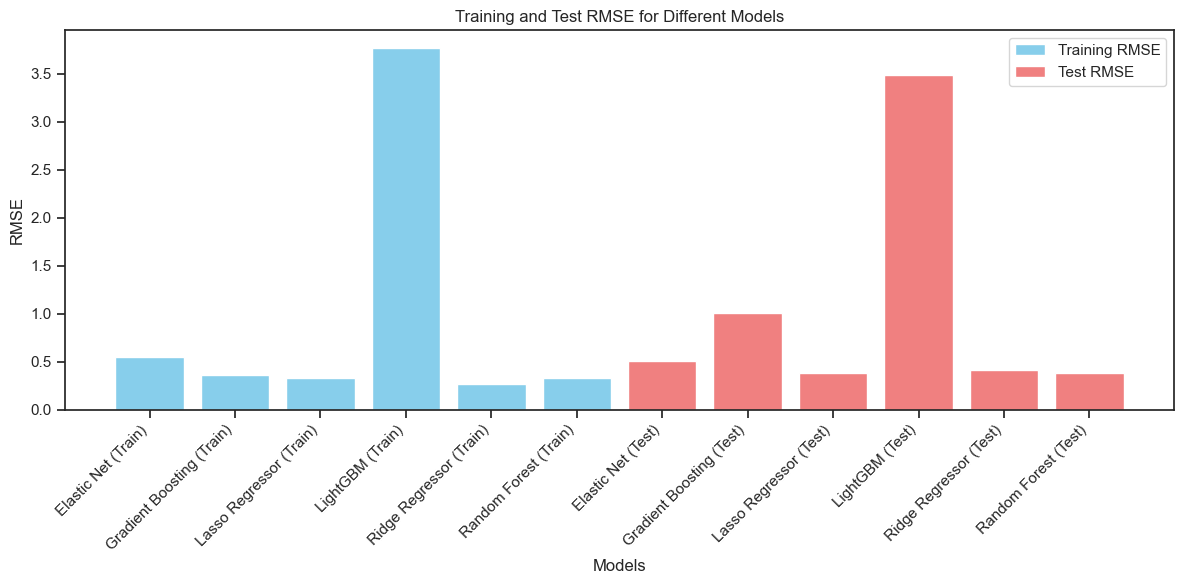

In [165]:
#Model names
model_names = ['Elastic Net', 'Gradient Boosting', 'Lasso Regressor', 'LightGBM', 'Ridge Regressor', 'Random Forest']
#RMSE Train Values 
train_rmse_values = [0.5441652035767083, 0.3665263380344902, 0.3312841257260795, 3.7647958540044333, 0.2626727879782546, 0.32981015189770047]
#RMSE Test Values
test_rmse_values = [0.5032509961662209, 1.0115898187485906, 0.3856319013417242, 3.484720259801525, 0.4151482325356103, 0.3828192660745118]
#Bar plots are created for both training and testing RMSE 
plt.figure(figsize=(12, 6))
#Training RMSE are plotted 
plt.bar([model_name + ' (Train)' for model_name in model_names], train_rmse_values, color='skyblue', label='Training RMSE')
#Testing RMSE are plotted 
plt.bar([model_name + ' (Test)' for model_name in model_names], test_rmse_values, color='lightcoral', label='Test RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

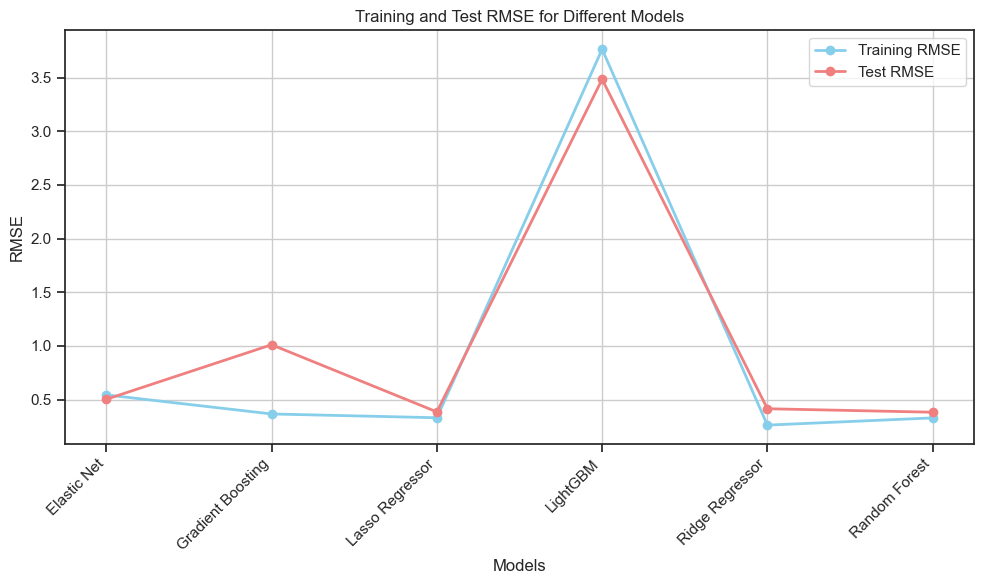

In [166]:
#Model names
model_names = ['Elastic Net', 'Gradient Boosting', 'Lasso Regressor', 'LightGBM', 'Ridge Regressor', 'Random Forest']
#RMSE values for the training
train_rmse_values = [0.5441652035767083, 0.3665263380344902, 0.3312841257260795, 3.7647958540044333, 0.2626727879782546, 0.32981015189770047]
#RMSE values for the testing
test_rmse_values = [0.5032509961662209, 1.0115898187485906, 0.3856319013417242, 3.484720259801525, 0.4151482325356103, 0.3828192660745118]
#Line plot is created for the train RMSE
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_rmse_values, marker='o', label='Training RMSE', color='skyblue', linewidth=2)
#Line plot is created for the test RMSE
plt.plot(model_names, test_rmse_values, marker='o', label='Test RMSE', color='lightcoral', linewidth=2)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Training and Test RMSE for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()